#  Health Data Analysis

In [1]:
## importing the library
import numpy as np
import scipy.stats 
import pandas as pd
import matplotlib.pyplot as plt
import pandas.plotting
from IPython import display
from ipywidgets import interact,widgets 
%matplotlib inline
import re
import mailbox
import csv
import seaborn as sns

In [2]:
## importing the dataset
data= pd.read_csv("/Users/sakshiashutosh/Downloads/heart_2020_cleaned.csv")

In [3]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [7]:
data.drop_duplicates(inplace=True)

## Heart Disease

#### The term “heart disease” refers to several types of heart conditions. The most common type of heart disease is coronary artery disease (CAD), which affects the blood flow to the heart. Decreased blood flow can cause a heart attack.

## What are the risk factors for heart disease?

#### High blood pressure, high blood cholesterol, and smoking are key risk factors for heart disease. About half of people in the United States (47%) have at least one of these three risk factors. Several other medical conditions and lifestyle choices can also put people at a higher risk for heart disease, including

* Diabetes
* Overweight and obesity
* Unhealthy diet
* Physical inactivity
* Excessive alcohol use


In [9]:
pd.DataFrame(data.HeartDisease).value_counts()

HeartDisease
No              274456
Yes              27261
dtype: int64

In [11]:
pd.DataFrame(data.HeartDisease).value_counts(normalize=True)

HeartDisease
No              0.909647
Yes             0.090353
dtype: float64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


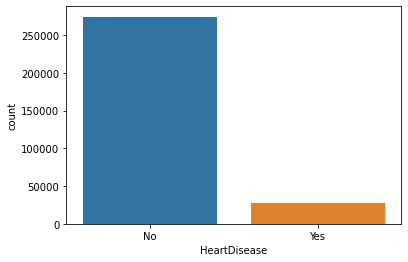

In [10]:
sns.countplot(data.HeartDisease)
plt.show()

* Around 90% of the persons are safe from heart disease.

### Heart Disease vs BMI

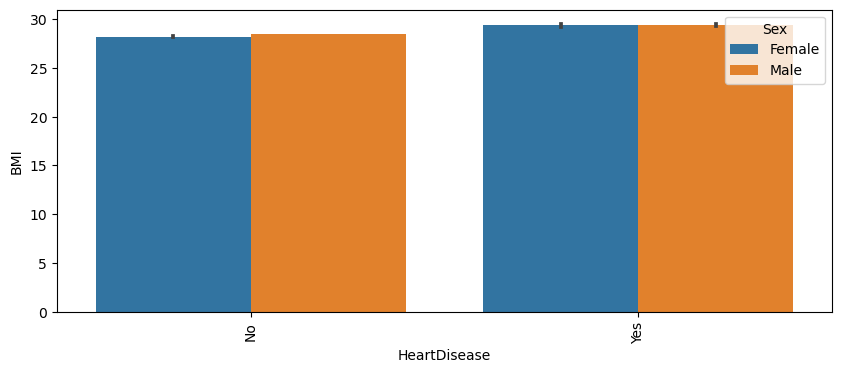

In [249]:
plt.figure(figsize=(10,4),dpi=100)
sns.barplot(x=data.HeartDisease,y=data.BMI,hue=data.Sex)
plt.xticks(rotation=90)
plt.show()

### Heart Disease Vs Smoking

heart_smoking=data.groupby('HeartDisease').Smoking.value_counts()
heart_smoking

In [13]:
heart_smoking=data.groupby('HeartDisease').Smoking.value_counts(normalize=True)
heart_smoking

HeartDisease  Smoking
No            No         0.594004
              Yes        0.405996
Yes           Yes        0.586075
              No         0.413925
Name: Smoking, dtype: float64

In [14]:
heart_smoking.unstack()

Smoking,No,Yes
HeartDisease,,
No,0.594004,0.405996
Yes,0.413925,0.586075


### Heart Disease vs Alcohol

In [15]:
heart_alcohol=data.groupby('HeartDisease').AlcoholDrinking.value_counts()
heart_alcohol

HeartDisease  AlcoholDrinking
No            No                 254016
              Yes                 20440
Yes           No                  26120
              Yes                  1141
Name: AlcoholDrinking, dtype: int64

In [16]:
heart_alcohol=data.groupby('HeartDisease').AlcoholDrinking.value_counts(normalize=True)
heart_alcohol=data.groupby('HeartDisease').AlcoholDrinking.value_counts()
heart_alcohol

HeartDisease  AlcoholDrinking
No            No                 0.925525
              Yes                0.074475
Yes           No                 0.958145
              Yes                0.041855
Name: AlcoholDrinking, dtype: float64

In [17]:
heart_alcohol.unstack()

AlcoholDrinking,No,Yes
HeartDisease,,
No,0.925525,0.074475
Yes,0.958145,0.041855


### Heart Disease vs Diff Walking

In [18]:
heart_DiffWalking=data.groupby('HeartDisease').DiffWalking.value_counts()
heart_DiffWalking

HeartDisease  DiffWalking
No            No             240125
              Yes             34331
Yes           No              17237
              Yes             10024
Name: DiffWalking, dtype: int64

In [19]:
heart_DiffWalking=data.groupby('HeartDisease').DiffWalking.value_counts(normalize=True)
heart_DiffWalking

HeartDisease  DiffWalking
No            No             0.874913
              Yes            0.125087
Yes           No             0.632295
              Yes            0.367705
Name: DiffWalking, dtype: float64

In [20]:
heart_DiffWalking.unstack()

DiffWalking,No,Yes
HeartDisease,,
No,0.874913,0.125087
Yes,0.632295,0.367705


### Heart Disease vs Sex

In [21]:
heart_Sex=data.groupby('HeartDisease').Sex.value_counts()
heart_Sex

HeartDisease  Sex   
No            Female    148458
              Male      125998
Yes           Male       16048
              Female     11213
Name: Sex, dtype: int64

In [22]:
heart_Sex=data.groupby('HeartDisease').Sex.value_counts(normalize=True)
heart_Sex

HeartDisease  Sex   
No            Female    0.540917
              Male      0.459083
Yes           Male      0.588680
              Female    0.411320
Name: Sex, dtype: float64

In [23]:
heart_Sex.unstack()

Sex,Female,Male
HeartDisease,,
No,0.540917,0.459083
Yes,0.411320,0.588680


### Heart Disease vs Age Category

In [24]:
heart_age=data.groupby('HeartDisease').AgeCategory.value_counts()
heart_age

HeartDisease  AgeCategory
No            60-64          27898
              65-69          27596
              55-59          25411
              70-74          24456
              50-54          22353
              18-24          19868
              45-49          19775
              40-44          19351
              35-39          19230
              80 or older    17926
              30-34          17727
              75-79          16686
              25-29          16179
Yes           80 or older     5426
              70-74           4817
              65-69           4074
              75-79           4027
              60-64           3321
              55-59           2199
              50-54           1383
              45-49            743
              40-44            486
              35-39            296
              30-34            226
              25-29            133
              18-24            130
Name: AgeCategory, dtype: int64

In [25]:
heart_age=data.groupby('HeartDisease').AgeCategory.value_counts(normalize=True)
heart_age

HeartDisease  AgeCategory
No            60-64          0.101648
              65-69          0.100548
              55-59          0.092587
              70-74          0.089107
              50-54          0.081445
              18-24          0.072390
              45-49          0.072052
              40-44          0.070507
              35-39          0.070066
              80 or older    0.065315
              30-34          0.064590
              75-79          0.060797
              25-29          0.058949
Yes           80 or older    0.199039
              70-74          0.176699
              65-69          0.149444
              75-79          0.147720
              60-64          0.121822
              55-59          0.080665
              50-54          0.050732
              45-49          0.027255
              40-44          0.017828
              35-39          0.010858
              30-34          0.008290
              25-29          0.004879
              18-24     

In [26]:
heart_age.unstack()

AgeCategory,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80 or older
HeartDisease,,,,,,,,,,,,,
No,0.072390,0.058949,0.06459,0.070066,0.070507,0.072052,0.081445,0.092587,0.101648,0.100548,0.089107,0.060797,0.065315
Yes,0.004769,0.004879,0.00829,0.010858,0.017828,0.027255,0.050732,0.080665,0.121822,0.149444,0.176699,0.147720,0.199039


### Heart Disease Vs Race

In [27]:
heart_race=data.groupby('HeartDisease').Race.value_counts()
heart_race

HeartDisease  Race                          
No            White                             205329
              Hispanic                           25664
              Black                              21081
              Other                              10005
              Asian                               7727
              American Indian/Alaskan Native      4650
Yes           White                              22395
              Black                               1729
              Hispanic                            1443
              Other                                886
              American Indian/Alaskan Native       542
              Asian                                266
Name: Race, dtype: int64

In [28]:
 heart_race=data.groupby('HeartDisease').Race.value_counts(normalize=True)
heart_race

HeartDisease  Race                          
No            White                             0.748131
              Hispanic                          0.093509
              Black                             0.076810
              Other                             0.036454
              Asian                             0.028154
              American Indian/Alaskan Native    0.016943
Yes           White                             0.821503
              Black                             0.063424
              Hispanic                          0.052933
              Other                             0.032501
              American Indian/Alaskan Native    0.019882
              Asian                             0.009758
Name: Race, dtype: float64

In [29]:
heart_race.unstack()

Race,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
HeartDisease,,,,,,
No,0.016943,0.028154,0.076810,0.093509,0.036454,0.748131
Yes,0.019882,0.009758,0.063424,0.052933,0.032501,0.821503


###  Heart Disease vs  Diabetic

In [30]:
heart_diabetic=data.groupby('HeartDisease').Diabetic.value_counts()
heart_diabetic

HeartDisease  Diabetic               
No            No                         234380
              Yes                         31641
              No, borderline diabetes      5987
              Yes (during pregnancy)       2448
Yes           No                          17416
              Yes                          8948
              No, borderline diabetes       789
              Yes (during pregnancy)        108
Name: Diabetic, dtype: int64

In [31]:
heart_diabetic=data.groupby('HeartDisease').Diabetic.value_counts(normalize=True)
heart_diabetic

HeartDisease  Diabetic               
No            No                         0.853980
              Yes                        0.115286
              No, borderline diabetes    0.021814
              Yes (during pregnancy)     0.008919
Yes           No                         0.638861
              Yes                        0.328234
              No, borderline diabetes    0.028942
              Yes (during pregnancy)     0.003962
Name: Diabetic, dtype: float64

In [32]:
heart_diabetic.unstack()

Diabetic,No,"No, borderline diabetes",Yes,Yes (during pregnancy)
HeartDisease,,,,
No,0.853980,0.021814,0.115286,0.008919
Yes,0.638861,0.028942,0.328234,0.003962


### Heart Disease Vs Physical Activity

In [33]:
heart_PhysicalActivity=data.groupby('HeartDisease').PhysicalActivity.value_counts()
heart_PhysicalActivity

HeartDisease  PhysicalActivity
No            Yes                 213033
              No                   61423
Yes           Yes                  17379
              No                    9882
Name: PhysicalActivity, dtype: int64

In [34]:
heart_PhysicalActivity=data.groupby('HeartDisease').PhysicalActivity.value_counts(normalize=True)
heart_PhysicalActivity

HeartDisease  PhysicalActivity
No            Yes                 0.776201
              No                  0.223799
Yes           Yes                 0.637504
              No                  0.362496
Name: PhysicalActivity, dtype: float64

In [35]:
heart_PhysicalActivity.unstack()

PhysicalActivity,No,Yes
HeartDisease,,
No,0.223799,0.776201
Yes,0.362496,0.637504


### Heart Disease Vs Gen Health

In [36]:
heart_GenHealth=data.groupby('HeartDisease').GenHealth.value_counts()
heart_GenHealth

HeartDisease  GenHealth
No            Very good    99468
              Good         81734
              Excellent    58242
              Fair         27576
              Poor          7436
Yes           Good          9505
              Fair          7083
              Very good     5328
              Poor          3850
              Excellent     1495
Name: GenHealth, dtype: int64

In [37]:
heart_GenHealth=data.groupby('HeartDisease').GenHealth.value_counts(normalize=True)
heart_GenHealth

HeartDisease  GenHealth
No            Very good    0.362419
              Good         0.297804
              Excellent    0.212209
              Fair         0.100475
              Poor         0.027094
Yes           Good         0.348667
              Fair         0.259822
              Very good    0.195444
              Poor         0.141227
              Excellent    0.054840
Name: GenHealth, dtype: float64

In [38]:
heart_GenHealth.unstack()

GenHealth,Excellent,Fair,Good,Poor,Very good
HeartDisease,,,,,
No,0.212209,0.100475,0.297804,0.027094,0.362419
Yes,0.054840,0.259822,0.348667,0.141227,0.195444


### BMI - Body Mass Index

Body mass index is a value derived from the mass and height of a person. The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m², resulting from mass in kilograms and height in metres. 
* A BMI of 18.5–24.9 indicates that a person has a healthy weight for their height.

* Below 18.5	Underweight
* 18.5–24.9	Healthy

* 25–29.9	Overweight

* 30 and above	Obese

BMI can give you an indication as to whether you’re at a healthy weight for your height, it’s far from perfect. BMI calculations and charts don’t adjust for your gender, age, race, ethnicity and other factors, which can impact your body fat and muscle—and therefore skew your BMI higher or lower.

In [39]:
def BMI_classifiaction(x):
    if x<18.5:
        return "under weight"
    if x>=18.5 and x<24.9:
        return "Healthy"
    if x>=24.9 and x<29.9:
        return "Over weight"
    if x>=30:
        return "Above Obese"
    
data["BMI_classifiaction"]=data["BMI"].apply(BMI_classifiaction)
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_classifiaction
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,under weight
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,Healthy
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,Over weight
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,Healthy
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No,Over weight
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No,Over weight
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No,Healthy
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No,Above Obese


In [40]:
pd.DataFrame(data.BMI_classifiaction).value_counts()

BMI_classifiaction
Over weight           105680
Above Obese           100344
Healthy                88767
under weight            5083
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


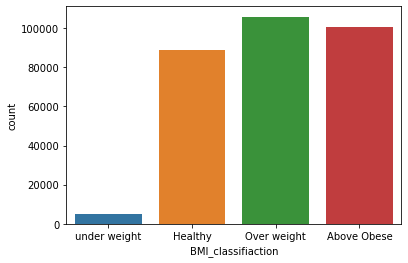

In [42]:
sns.countplot(data.BMI_classifiaction)
plt.show()

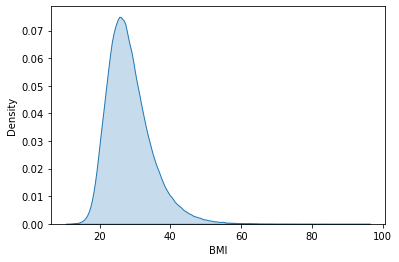

In [155]:
sns.kdeplot(x='BMI',data=data,shade=True)
plt.show()

* High density of population is found in betweeb BMI of 20-40 approx.

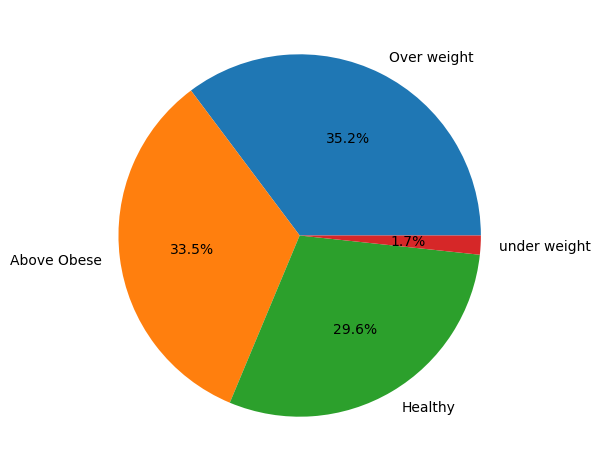

In [347]:
plt.figure(figsize=(10,6),dpi=100)
BMI_classifiaction=pd.DataFrame(data.BMI_classifiaction).value_counts()
BMI_classifiaction_labels=('Over weight','Above Obese','Healthy','under weight')
plt.pie(BMI_classifiaction,labels=BMI_classifiaction_labels,autopct='%1.1f%%',textprops={'fontsize':10,'color':'black'})
plt.show()

## Smoking
#### Cigarette smoking harms nearly every organ of the body, causes many diseases, and reduces the health of smokers in general.1,2
* Quitting smoking lowers your risk for smoking-related diseases and can add years to your life.
* Smoking causes stroke and coronary heart disease, which are among the leading causes of death.
* Cigarette smoking causes most cases of lung cancer.
* If you have asthma, tobacco smoke can trigger an attack or make an attack worse.
* Smoking can cause cancer almost anywhere in your body:1,2
* Smoking is a cause of type 2 diabetes mellitus and can make it harder to control. 
* The risk of developing diabetes is 30–40% higher for active smokers than nonsmokers.1,2



In [43]:
pd.DataFrame(data.Smoking).value_counts()

Smoking
No         174312
Yes        127405
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


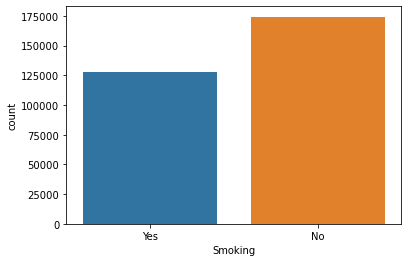

In [45]:
sns.countplot(data.Smoking)
plt.show()

### Smoking vs BMI

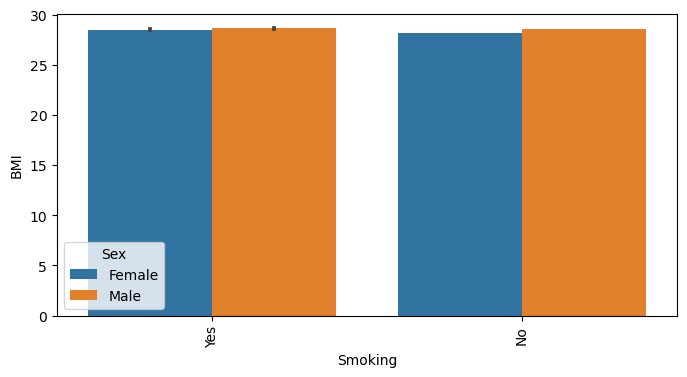

In [348]:
plt.figure(figsize=(8,4),dpi=100)
sns.barplot(x=data.Smoking,y=data.BMI,hue=data.Sex)
plt.xticks(rotation=90)
plt.show()

### Smoking vs Heart Disease

In [46]:
smoking_heart=data.groupby("Smoking").HeartDisease.value_counts()
smoking_heart

Smoking  HeartDisease
No       No              163028
         Yes              11284
Yes      No              111428
         Yes              15977
Name: HeartDisease, dtype: int64

In [47]:
smoking_heart=data.groupby("Smoking").HeartDisease.value_counts(normalize=True)
smoking_heart

Smoking  HeartDisease
No       No              0.935266
         Yes             0.064734
Yes      No              0.874597
         Yes             0.125403
Name: HeartDisease, dtype: float64

In [48]:
smoking_heart.unstack()

HeartDisease,No,Yes
Smoking,,
No,0.935266,0.064734
Yes,0.874597,0.125403


### Smoking vs Alcohol drinking

In [49]:
smoking_alcohol=data.groupby("Smoking").AlcoholDrinking.value_counts()
smoking_alcohol

Smoking  AlcoholDrinking
No       No                 166037
         Yes                  8275
Yes      No                 114099
         Yes                 13306
Name: AlcoholDrinking, dtype: int64

In [50]:
smoking_alcohol=data.groupby("Smoking").AlcoholDrinking.value_counts(normalize=True)
smoking_alcohol

Smoking  AlcoholDrinking
No       No                 0.952528
         Yes                0.047472
Yes      No                 0.895561
         Yes                0.104439
Name: AlcoholDrinking, dtype: float64

In [51]:
smoking_alcohol.unstack()

AlcoholDrinking,No,Yes
Smoking,,
No,0.952528,0.047472
Yes,0.895561,0.104439


### Smoking vs Stroke

In [52]:
smoking_stroke=data.groupby("Smoking").Stroke.value_counts()
smoking_stroke

Smoking  Stroke
No       No        169061
         Yes         5251
Yes      No        120592
         Yes         6813
Name: Stroke, dtype: int64

In [53]:
smoking_stroke=data.groupby("Smoking").Stroke.value_counts(normalize=True)
smoking_stroke

Smoking  Stroke
No       No        0.969876
         Yes       0.030124
Yes      No        0.946525
         Yes       0.053475
Name: Stroke, dtype: float64

In [54]:
smoking_stroke.unstack()

Stroke,No,Yes
Smoking,,
No,0.969876,0.030124
Yes,0.946525,0.053475


### Smoking vs Diff walking

In [55]:
smoking_diff_walking=data.groupby("Smoking").DiffWalking.value_counts()
smoking_diff_walking

Smoking  DiffWalking
No       No             154797
         Yes             19515
Yes      No             102565
         Yes             24840
Name: DiffWalking, dtype: int64

In [56]:
smoking_diff_walking=data.groupby("Smoking").DiffWalking.value_counts(normalize=True)
smoking_diff_walking

Smoking  DiffWalking
No       No             0.888046
         Yes            0.111954
Yes      No             0.805031
         Yes            0.194969
Name: DiffWalking, dtype: float64

In [57]:
smoking_diff_walking.unstack()

DiffWalking,No,Yes
Smoking,,
No,0.888046,0.111954
Yes,0.805031,0.194969


### Smoking vs Sex

In [58]:
smoking_sex=data.groupby("Smoking").Sex.value_counts()
smoking_sex

Smoking  Sex   
No       Female    98757
         Male      75555
Yes      Male      66491
         Female    60914
Name: Sex, dtype: int64

In [59]:
smoking_sex=data.groupby("Smoking").Sex.value_counts(normalize=True)
smoking_sex

Smoking  Sex   
No       Female    0.566553
         Male      0.433447
Yes      Male      0.521887
         Female    0.478113
Name: Sex, dtype: float64

In [60]:
smoking_sex.unstack()

Sex,Female,Male
Smoking,,
No,0.566553,0.433447
Yes,0.478113,0.521887


### Smoking vs AgeCategory

In [62]:
smoking_age=data.groupby("Smoking").AgeCategory.value_counts()
smoking_age

Smoking  AgeCategory
No       65-69          16860
         18-24          16742
         60-64          16470
         55-59          15366
         70-74          15010
         50-54          14090
         80 or older    13028
         45-49          12085
         25-29          11226
         35-39          11156
         40-44          11077
         30-34          10948
         75-79          10254
Yes      65-69          14810
         60-64          14749
         70-74          14263
         55-59          12244
         75-79          10459
         80 or older    10324
         50-54           9646
         40-44           8760
         45-49           8433
         35-39           8370
         30-34           7005
         25-29           5086
         18-24           3256
Name: AgeCategory, dtype: int64

In [63]:
smoking_age=data.groupby("Smoking").AgeCategory.value_counts(normalize=True)
smoking_age

Smoking  AgeCategory
No       65-69          0.096723
         18-24          0.096046
         60-64          0.094486
         55-59          0.088152
         70-74          0.086110
         50-54          0.080832
         80 or older    0.074740
         45-49          0.069330
         25-29          0.064402
         35-39          0.064000
         40-44          0.063547
         30-34          0.062807
         75-79          0.058826
Yes      65-69          0.116243
         60-64          0.115765
         70-74          0.111950
         55-59          0.096103
         75-79          0.082093
         80 or older    0.081033
         50-54          0.075711
         40-44          0.068757
         45-49          0.066190
         35-39          0.065696
         30-34          0.054982
         25-29          0.039920
         18-24          0.025556
Name: AgeCategory, dtype: float64

In [64]:
smoking_age.unstack()

AgeCategory,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80 or older
Smoking,,,,,,,,,,,,,
No,0.096046,0.064402,0.062807,0.064000,0.063547,0.06933,0.080832,0.088152,0.094486,0.096723,0.08611,0.058826,0.074740
Yes,0.025556,0.039920,0.054982,0.065696,0.068757,0.06619,0.075711,0.096103,0.115765,0.116243,0.11195,0.082093,0.081033


### Smoking vs Race

In [65]:
smoking_race=data.groupby("Smoking").Race.value_counts()
smoking_race

Smoking  Race                          
No       White                             126200
         Hispanic                           18772
         Black                              14920
         Asian                               6157
         Other                               5923
         American Indian/Alaskan Native      2340
Yes      White                             101524
         Hispanic                            8335
         Black                               7890
         Other                               4968
         American Indian/Alaskan Native      2852
         Asian                               1836
Name: Race, dtype: int64

In [66]:
smoking_race=data.groupby("Smoking").Race.value_counts(normalize=True)
smoking_race

Smoking  Race                          
No       White                             0.723989
         Hispanic                          0.107692
         Black                             0.085594
         Asian                             0.035322
         Other                             0.033979
         American Indian/Alaskan Native    0.013424
Yes      White                             0.796860
         Hispanic                          0.065421
         Black                             0.061928
         Other                             0.038994
         American Indian/Alaskan Native    0.022385
         Asian                             0.014411
Name: Race, dtype: float64

In [67]:
smoking_race.unstack()

Race,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
Smoking,,,,,,
No,0.013424,0.035322,0.085594,0.107692,0.033979,0.723989
Yes,0.022385,0.014411,0.061928,0.065421,0.038994,0.796860


### Smoking vs Diabetic

In [68]:
smoking_diabetic=data.groupby("Smoking").Diabetic.value_counts()
smoking_diabetic

Smoking  Diabetic               
No       No                         148139
         Yes                         20780
         No, borderline diabetes      3817
         Yes (during pregnancy)       1576
Yes      No                         103657
         Yes                         19809
         No, borderline diabetes      2959
         Yes (during pregnancy)        980
Name: Diabetic, dtype: int64

In [69]:
smoking_diabetic=data.groupby("Smoking").Diabetic.value_counts(normalize=True)
smoking_diabetic

Smoking  Diabetic               
No       No                         0.849850
         Yes                        0.119212
         No, borderline diabetes    0.021898
         Yes (during pregnancy)     0.009041
Yes      No                         0.813602
         Yes                        0.155481
         No, borderline diabetes    0.023225
         Yes (during pregnancy)     0.007692
Name: Diabetic, dtype: float64

In [70]:
smoking_diabetic.unstack()

Diabetic,No,"No, borderline diabetes",Yes,Yes (during pregnancy)
Smoking,,,,
No,0.849850,0.021898,0.119212,0.009041
Yes,0.813602,0.023225,0.155481,0.007692


### Smoking vs Physical activity

In [72]:
smoking_physical_activity=data.groupby("Smoking").PhysicalActivity.value_counts()
smoking_physical_activity

Smoking  PhysicalActivity
No       Yes                 138806
         No                   35506
Yes      Yes                  91606
         No                   35799
Name: PhysicalActivity, dtype: int64

In [73]:
smoking_physical_activity=data.groupby("Smoking").PhysicalActivity.value_counts(normalize=True)
smoking_physical_activity

Smoking  PhysicalActivity
No       Yes                 0.796308
         No                  0.203692
Yes      Yes                 0.719014
         No                  0.280986
Name: PhysicalActivity, dtype: float64

In [74]:
smoking_physical_activity.unstack()

PhysicalActivity,No,Yes
Smoking,,
No,0.203692,0.796308
Yes,0.280986,0.719014


### Smoking vs Gen Health

In [75]:
smoking_gen_health=data.groupby("Smoking").GenHealth.value_counts()
smoking_gen_health

Smoking  GenHealth
No       Very good    64351
         Good         49289
         Excellent    40871
         Fair         15683
         Poor          4118
Yes      Good         41950
         Very good    40445
         Fair         18976
         Excellent    18866
         Poor          7168
Name: GenHealth, dtype: int64

In [76]:
smoking_gen_health=data.groupby("Smoking").GenHealth.value_counts(normalize=True)
smoking_gen_health

Smoking  GenHealth
No       Very good    0.369171
         Good         0.282763
         Excellent    0.234470
         Fair         0.089971
         Poor         0.023624
Yes      Good         0.329265
         Very good    0.317452
         Fair         0.148942
         Excellent    0.148079
         Poor         0.056262
Name: GenHealth, dtype: float64

In [77]:
smoking_gen_health.unstack()

GenHealth,Excellent,Fair,Good,Poor,Very good
Smoking,,,,,
No,0.234470,0.089971,0.282763,0.023624,0.369171
Yes,0.148079,0.148942,0.329265,0.056262,0.317452


### Smoking vs Asthma

In [78]:
smoking_asthma=data.groupby("Smoking").Asthma.value_counts()
smoking_asthma

Smoking  Asthma
No       No        150582
         Yes        23730
Yes      No        108484
         Yes        18921
Name: Asthma, dtype: int64

In [79]:
smoking_asthma=data.groupby("Smoking").Asthma.value_counts(normalize=True)
smoking_asthma

Smoking  Asthma
No       No        0.863865
         Yes       0.136135
Yes      No        0.851489
         Yes       0.148511
Name: Asthma, dtype: float64

In [80]:
smoking_asthma.unstack()

Asthma,No,Yes
Smoking,,
No,0.863865,0.136135
Yes,0.851489,0.148511


## Stroke
#### A stroke, sometimes called a brain attack, occurs when something blocks blood supply to part of the brain or when a blood vessel in the brain bursts. In either case, parts of the brain become damaged or die. A stroke can cause lasting brain damage, long-term disability, or even death.
* High blood pressure is the leading cause of stroke and is the main cause for increased risk of stroke among people with diabetes.
#### Lifestyle causing stoke
   * Being overweight or obese
   * Physical inactivity
   * Heavy or binge drinking
#### Medical factor 
   * High blood pressure
   * Cigarette smoking or secondhand smoke exposure
   * High cholesterol
   * Diabetes
   * Obstructive sleep apnea
   * Cardiovascular disease, including heart failure, heart defects, heart infection or irregular heart rhythm, such as atrial fibrillation

#### Other factors
   * Age — People age 55 or older have a higher risk of stroke than do younger people.
   * Race or ethnicity — African Americans and Hispanics have a higher risk of stroke than do people of other races or ethnicities.
   * Sex — Men have a higher risk of stroke than do women. Women are usually older when they have strokes, and they're more likely to die of strokes than are men.
   * Hormones — Use of birth control pills or hormone therapies that include estrogen increases risk.


In [82]:
pd.DataFrame(data.Stroke).value_counts()

Stroke
No        289653
Yes        12064
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stroke', ylabel='count'>

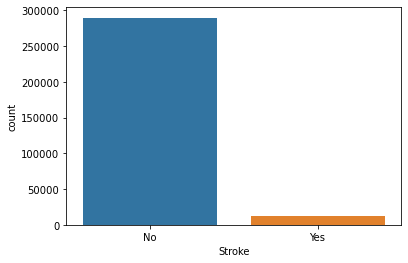

In [83]:
sns.countplot(data.Stroke)

### Stroke vs BMI

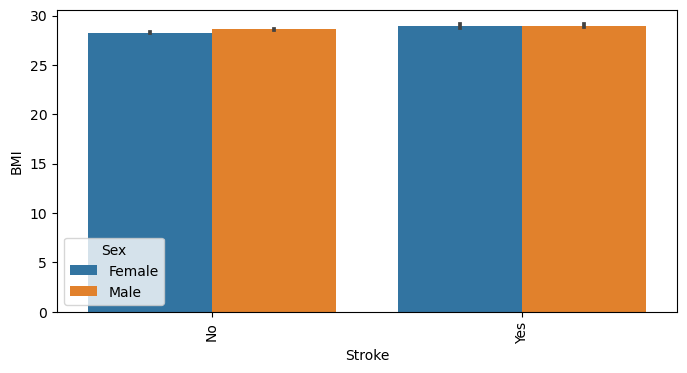

In [349]:
plt.figure(figsize=(8,4),dpi=100)
sns.barplot(x=data.Stroke,y=data.BMI,hue=data.Sex)
plt.xticks(rotation=90)
plt.show()

### Stroke vs Heart Disease

In [85]:
stroke_heart=data.groupby("Stroke").HeartDisease.value_counts()
stroke_heart

Stroke  HeartDisease
No      No              266781
        Yes              22872
Yes     No                7675
        Yes               4389
Name: HeartDisease, dtype: int64

In [86]:
stroke_heart=data.groupby("Stroke").HeartDisease.value_counts(normalize=True)
stroke_heart

Stroke  HeartDisease
No      No              0.921037
        Yes             0.078963
Yes     No              0.636190
        Yes             0.363810
Name: HeartDisease, dtype: float64

In [87]:
stroke_heart.unstack()

HeartDisease,No,Yes
Stroke,,
No,0.921037,0.078963
Yes,0.636190,0.363810


### Stroke vs Smoking

In [88]:
stroke_smoking=data.groupby("Stroke").Smoking.value_counts()
stroke_smoking

Stroke  Smoking
No      No         169061
        Yes        120592
Yes     Yes          6813
        No           5251
Name: Smoking, dtype: int64

In [89]:
stroke_smoking=data.groupby("Stroke").Smoking.value_counts(normalize=True)
stroke_smoking

Stroke  Smoking
No      No         0.583667
        Yes        0.416333
Yes     Yes        0.564738
        No         0.435262
Name: Smoking, dtype: float64

In [90]:
stroke_smoking.unstack()

Smoking,No,Yes
Stroke,,
No,0.583667,0.416333
Yes,0.435262,0.564738


### Stroke vs AlcoholDrinking

In [91]:
stroke_alcohol=data.groupby("Stroke").AlcoholDrinking.value_counts()
stroke_alcohol

Stroke  AlcoholDrinking
No      No                 268589
        Yes                 21064
Yes     No                  11547
        Yes                   517
Name: AlcoholDrinking, dtype: int64

In [92]:
stroke_alcohol=data.groupby("Stroke").AlcoholDrinking.value_counts(normalize=True)
stroke_alcohol

Stroke  AlcoholDrinking
No      No                 0.927279
        Yes                0.072721
Yes     No                 0.957145
        Yes                0.042855
Name: AlcoholDrinking, dtype: float64

In [93]:
stroke_alcohol.unstack()

AlcoholDrinking,No,Yes
Stroke,,
No,0.927279,0.072721
Yes,0.957145,0.042855


### Stroke vs Sex

In [94]:
stroke_sex=data.groupby("Stroke").Sex.value_counts()
stroke_sex

Stroke  Sex   
No      Female    153247
        Male      136406
Yes     Female      6424
        Male        5640
Name: Sex, dtype: int64

In [95]:
stroke_sex=data.groupby("Stroke").Sex.value_counts(normalize=True)
stroke_sex

Stroke  Sex   
No      Female    0.529071
        Male      0.470929
Yes     Female    0.532493
        Male      0.467507
Name: Sex, dtype: float64

In [96]:
stroke_sex.unstack()

Sex,Female,Male
Stroke,,
No,0.529071,0.470929
Yes,0.532493,0.467507


### Stroke vs Age Category

In [97]:
stroke_age=data.groupby("Stroke").AgeCategory.value_counts()
stroke_age

Stroke  AgeCategory
No      65-69          29966
        60-64          29736
        70-74          27384
        55-59          26509
        50-54          23051
        80 or older    21054
        45-49          20091
        18-24          19937
        40-44          19544
        35-39          19333
        75-79          19004
        30-34          17822
        25-29          16222
Yes     80 or older     2298
        70-74           1889
        75-79           1709
        65-69           1704
        60-64           1483
        55-59           1101
        50-54            685
        45-49            427
        40-44            293
        35-39            193
        30-34            131
        25-29             90
        18-24             61
Name: AgeCategory, dtype: int64

In [98]:
stroke_age=data.groupby("Stroke").AgeCategory.value_counts(normalize=True)
stroke_age

Stroke  AgeCategory
No      65-69          0.103455
        60-64          0.102661
        70-74          0.094541
        55-59          0.091520
        50-54          0.079581
        80 or older    0.072687
        45-49          0.069362
        18-24          0.068831
        40-44          0.067474
        35-39          0.066745
        75-79          0.065610
        30-34          0.061529
        25-29          0.056005
Yes     80 or older    0.190484
        70-74          0.156582
        75-79          0.141661
        65-69          0.141247
        60-64          0.122928
        55-59          0.091263
        50-54          0.056781
        45-49          0.035395
        40-44          0.024287
        35-39          0.015998
        30-34          0.010859
        25-29          0.007460
        18-24          0.005056
Name: AgeCategory, dtype: float64

In [99]:
stroke_age.unstack()

AgeCategory,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80 or older
Stroke,,,,,,,,,,,,,
No,0.068831,0.056005,0.061529,0.066745,0.067474,0.069362,0.079581,0.091520,0.102661,0.103455,0.094541,0.065610,0.072687
Yes,0.005056,0.007460,0.010859,0.015998,0.024287,0.035395,0.056781,0.091263,0.122928,0.141247,0.156582,0.141661,0.190484


### Stroke vs Race

In [100]:
stroke_race=data.groupby("Stroke").Race.value_counts()
stroke_race

Stroke  Race                          
No      White                             218444
        Hispanic                           26512
        Black                              21554
        Other                              10415
        Asian                               7842
        American Indian/Alaskan Native      4886
Yes     White                               9280
        Black                               1256
        Hispanic                             595
        Other                                476
        American Indian/Alaskan Native       306
        Asian                                151
Name: Race, dtype: int64

In [101]:
stroke_race=data.groupby("Stroke").Race.value_counts(normalize=True)
stroke_race

Stroke  Race                          
No      White                             0.754158
        Hispanic                          0.091530
        Black                             0.074413
        Other                             0.035957
        Asian                             0.027074
        American Indian/Alaskan Native    0.016868
Yes     White                             0.769231
        Black                             0.104111
        Hispanic                          0.049320
        Other                             0.039456
        American Indian/Alaskan Native    0.025365
        Asian                             0.012517
Name: Race, dtype: float64

In [102]:
stroke_race.unstack()

Race,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
Stroke,,,,,,
No,0.016868,0.027074,0.074413,0.09153,0.035957,0.754158
Yes,0.025365,0.012517,0.104111,0.04932,0.039456,0.769231


### Stroke vs Diabetic

In [103]:
stroke_diabetic=data.groupby("Stroke").Diabetic.value_counts()
stroke_diabetic

Stroke  Diabetic               
No      No                         243901
        Yes                         36846
        No, borderline diabetes      6422
        Yes (during pregnancy)       2484
Yes     No                           7895
        Yes                          3743
        No, borderline diabetes       354
        Yes (during pregnancy)         72
Name: Diabetic, dtype: int64

In [104]:
stroke_diabetic=data.groupby("Stroke").Diabetic.value_counts(normalize=True)
stroke_diabetic

Stroke  Diabetic               
No      No                         0.842045
        Yes                        0.127207
        No, borderline diabetes    0.022171
        Yes (during pregnancy)     0.008576
Yes     No                         0.654426
        Yes                        0.310262
        No, borderline diabetes    0.029344
        Yes (during pregnancy)     0.005968
Name: Diabetic, dtype: float64

In [105]:
stroke_diabetic.unstack()

Diabetic,No,"No, borderline diabetes",Yes,Yes (during pregnancy)
Stroke,,,,
No,0.842045,0.022171,0.127207,0.008576
Yes,0.654426,0.029344,0.310262,0.005968


### Stroke vs PhysicalActivity 

In [107]:
stroke_physical_activity=data.groupby("Stroke").PhysicalActivity.value_counts()
stroke_physical_activity

Stroke  PhysicalActivity
No      Yes                 223080
        No                   66573
Yes     Yes                   7332
        No                    4732
Name: PhysicalActivity, dtype: int64

In [108]:
stroke_physical_activity=data.groupby("Stroke").PhysicalActivity.value_counts(normalize=True)
stroke_physical_activity

Stroke  PhysicalActivity
No      Yes                 0.770163
        No                  0.229837
Yes     Yes                 0.607759
        No                  0.392241
Name: PhysicalActivity, dtype: float64

In [109]:
stroke_physical_activity.unstack()

PhysicalActivity,No,Yes
Stroke,,
No,0.229837,0.770163
Yes,0.392241,0.607759


### Stroke vs GenHealth

In [110]:
stroke_physical_activity=data.groupby("Stroke").GenHealth.value_counts()
stroke_physical_activity

Stroke  GenHealth
No      Very good    102526
        Good          87363
        Excellent     59046
        Fair          31361
        Poor           9357
Yes     Good           3876
        Fair           3298
        Very good      2270
        Poor           1929
        Excellent       691
Name: GenHealth, dtype: int64

In [111]:
stroke_physical_activity=data.groupby("Stroke").GenHealth.value_counts(normalize=True)
stroke_physical_activity

Stroke  GenHealth
No      Very good    0.353961
        Good         0.301613
        Excellent    0.203851
        Fair         0.108271
        Poor         0.032304
Yes     Good         0.321286
        Fair         0.273375
        Very good    0.188163
        Poor         0.159897
        Excellent    0.057278
Name: GenHealth, dtype: float64

In [112]:
stroke_physical_activity.unstack()

GenHealth,Excellent,Fair,Good,Poor,Very good
Stroke,,,,,
No,0.203851,0.108271,0.301613,0.032304,0.353961
Yes,0.057278,0.273375,0.321286,0.159897,0.188163


## Physical health
 #### Physical health is defined as an organism's normal function at all levels
### Benifits of having good physical health-
  * Helps prevent unhealthy weight gain.

  * Reduces the risk of many chronic diseases, such as heart disease, cancer, and type 2 diabetes.

  * Helps reduce feelings of anxiety and improves sleep quality.

  * Improved bone and musculoskeletal health.

  

In [113]:
data.PhysicalHealth.describe()

count    301717.000000
mean          3.572298
std           8.140656
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: PhysicalHealth, dtype: float64

In [114]:
data.PhysicalHealth.unique()

array([ 3.,  0., 20., 28.,  6., 15.,  5., 30.,  7.,  1.,  2., 21.,  4.,
       10., 14., 18.,  8., 25., 16., 29., 27., 17., 24., 12., 23., 26.,
       22., 19.,  9., 13., 11.])

In [115]:
pd.DataFrame(data.PhysicalHealth).value_counts()

PhysicalHealth
0.0               208611
30.0               19503
2.0                14846
1.0                10459
3.0                 8608
5.0                 7590
10.0                5450
15.0                5012
7.0                 4629
4.0                 4467
20.0                3216
14.0                2892
6.0                 1270
25.0                1164
8.0                  924
21.0                 626
12.0                 605
28.0                 446
29.0                 204
9.0                  180
18.0                 167
16.0                 135
27.0                 124
17.0                 110
13.0                  91
22.0                  89
11.0                  85
24.0                  67
26.0                  66
23.0                  46
19.0                  35
dtype: int64

<AxesSubplot:xlabel='PhysicalHealth', ylabel='Density'>

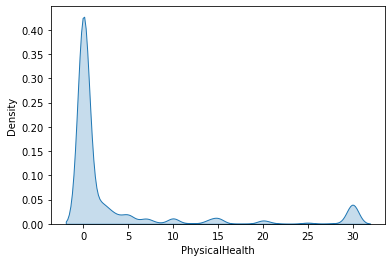

In [116]:
sns.kdeplot(x='PhysicalHealth',data=data,shade=True)

* A large density of population is having Physical Health value between 0-5 Approximately .


In [117]:
def physical_health_value(x):
    if x < 5:
        return "Less than 5"
    if x>= 5 and x<10:
        return "betw 5-10"
    if x>=10 and x<15:
        return "betw 10-15"
    if x>=15 and x<20:
        return "betw 15-20"
    if x>=20 and x<25 :
        return "betw 20-25"
    if x>=25:
        return "More than 25"
data['physical_health_value']=data['PhysicalHealth'].apply(physical_health_value)
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_classifiaction,physical_health_value
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,under weight,Less than 5
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,Healthy,Less than 5
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,Over weight,betw 20-25
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,Healthy,Less than 5
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,Healthy,More than 25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No,Over weight,betw 5-10
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No,Over weight,Less than 5
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No,Healthy,Less than 5
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No,Above Obese,Less than 5


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


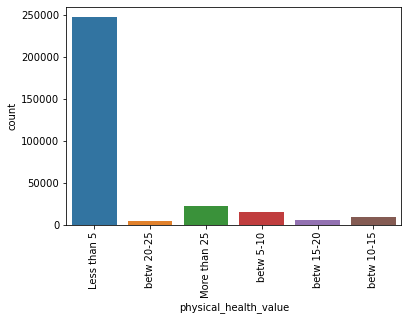

In [118]:
sns.countplot(data.physical_health_value)
plt.xticks(rotation=90)
plt.show()

In [126]:
pd.DataFrame(data.physical_health_value).value_counts()

physical_health_value
Less than 5              246991
More than 25              21507
betw 5-10                 14593
betw 10-15                 9123
betw 15-20                 5459
betw 20-25                 4044
dtype: int64

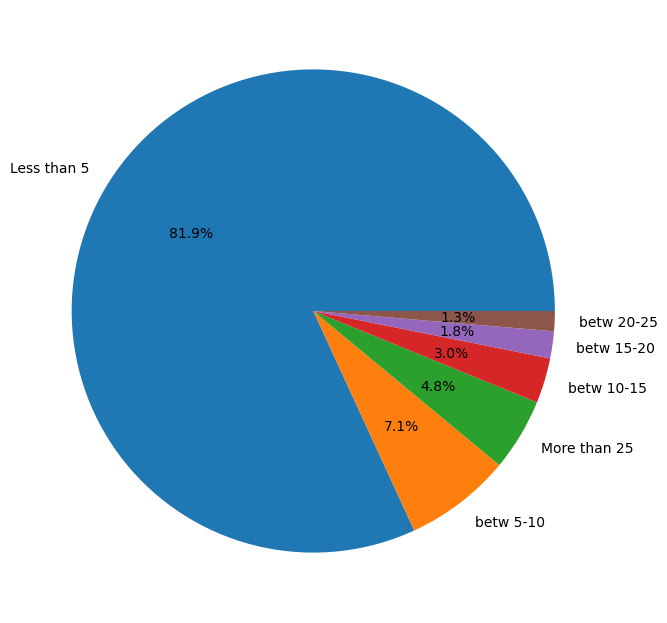

In [353]:
plt.figure(figsize=(12,8),dpi=100)
physical_health_value=pd.DataFrame(data.physical_health_value).value_counts()
physical_health_value_labels=['Less than 5','betw 5-10','More than 25','betw 10-15','betw 15-20','betw 20-25']
plt.pie(physical_health_value,labels=physical_health_value_labels,autopct='%1.1f%%',textprops={'fontsize':10,'color':'black'})
plt.show()

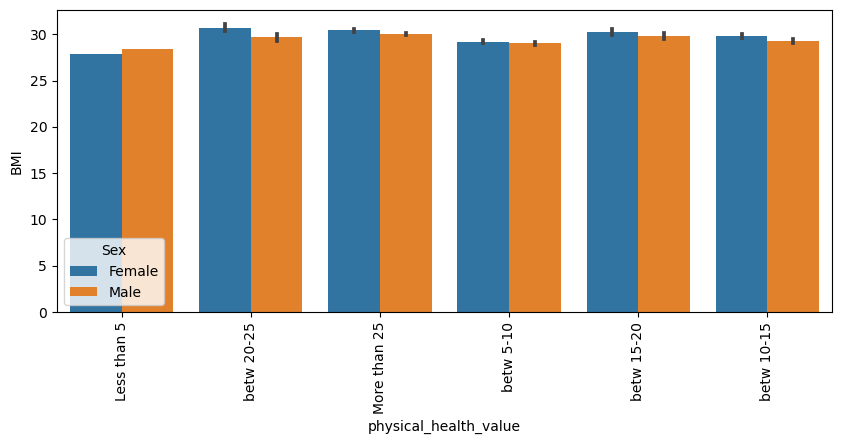

In [245]:
plt.figure(figsize=(10,4),dpi=100)
sns.barplot(x=data.physical_health_value,y=data.BMI,hue=data.Sex)
plt.xticks(rotation=90)
plt.show()

## Mental health
#### Mental health refers to cognitive, behavioral, and emotional well-being. It is all about how people think, feel, and behave. 
##### Poor mental health can lead to serious problems-
* Smoking
* Alcohol Drinking
* Stroke
* Heart disease and , many more....

<AxesSubplot:xlabel='MentalHealth', ylabel='Density'>

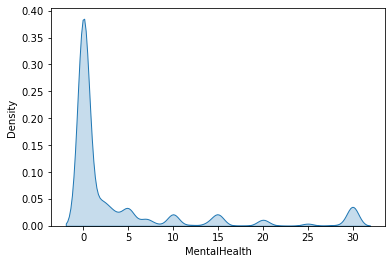

In [156]:
sns.kdeplot(x="MentalHealth",data=data,shade=True)

* A large density of population is having Mental Health value between 0-5approximately .

## Physical Health and Mental Health
 ##### Physical health and mental health are strongly connected. Taking care of your physical health is scientifically shown to improve mental wellbeing, and vice versa. If one declines, the other can be affected too.
##### Regular exercise, a balanced diet, proper sleep, and cutting down smoking, alcohol, and drug use are vital to physical health and mental wellbeing.



In [119]:
data.MentalHealth.describe()

count    301717.000000
mean          4.121475
std           8.128288
min           0.000000
25%           0.000000
50%           0.000000
75%           4.000000
max          30.000000
Name: MentalHealth, dtype: float64

In [120]:
data.MentalHealth.unique()

array([30.,  0.,  2.,  5., 15.,  8.,  4.,  3., 10., 14., 20.,  1.,  7.,
       24.,  9., 28., 16., 12.,  6., 25., 17., 18., 21., 29., 22., 13.,
       23., 27., 26., 11., 19.])

In [121]:
pd.DataFrame(data.MentalHealth).value_counts()

MentalHealth
0.0             187898
30.0             17351
2.0              16309
5.0              14004
10.0             10459
3.0              10412
15.0              9871
1.0               9235
7.0               5516
20.0              5426
4.0               5364
14.0              2048
25.0              1953
6.0               1510
8.0               1094
12.0               757
28.0               515
21.0               352
29.0               317
18.0               211
9.0                203
16.0               152
17.0               128
27.0               126
13.0               110
22.0                98
11.0                83
23.0                68
24.0                67
26.0                59
19.0                21
dtype: int64

In [122]:
def mental_health_value(x):
    if x<5:
        return "Less than 5"
    if x>= 5 and x<10:
        return "betw 5-10"
    if x>=10 and x<15:
        return "betw 10-15"
    if x>=15 and x<20:
        return "betw 15-20"
    if x>=20 and x<25 :
        return "betw 20-25"
    if x>=25:
        return "More than 25"
data['mental_health_value']=data['MentalHealth'].apply(mental_health_value)
data

    

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_classifiaction,physical_health_value,mental_health_value
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,...,Yes,Yes,Very good,5.0,Yes,No,Yes,under weight,Less than 5,More than 25
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,...,No,Yes,Very good,7.0,No,No,No,Healthy,Less than 5,Less than 5
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,...,Yes,Yes,Fair,8.0,Yes,No,No,Over weight,betw 20-25,More than 25
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,...,No,No,Good,6.0,No,No,Yes,Healthy,Less than 5,Less than 5
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,...,No,Yes,Very good,8.0,No,No,No,Healthy,More than 25,Less than 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,...,Yes,No,Fair,6.0,Yes,No,No,Over weight,betw 5-10,Less than 5
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,...,No,Yes,Very good,5.0,Yes,No,No,Over weight,Less than 5,Less than 5
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,...,No,Yes,Good,6.0,No,No,No,Healthy,Less than 5,Less than 5
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,...,No,No,Good,12.0,No,No,No,Above Obese,Less than 5,Less than 5


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


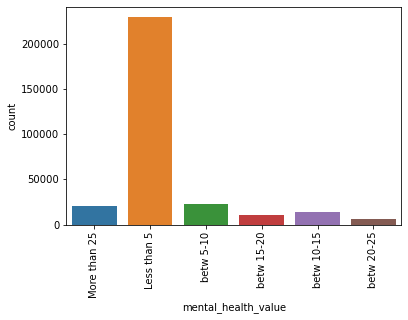

In [123]:
sns.countplot(data.mental_health_value)
plt.xticks(rotation=90)
plt.show()

In [124]:
pd.DataFrame(data.mental_health_value).value_counts()

mental_health_value
Less than 5            229218
betw 5-10               22327
More than 25            20321
betw 10-15              13457
betw 15-20              10383
betw 20-25               6011
dtype: int64

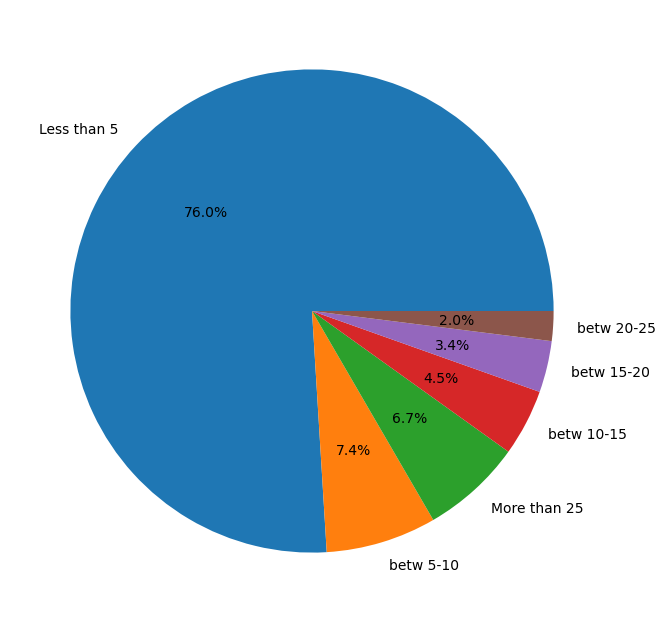

In [125]:
plt.figure(figsize=(12,8),dpi=100)
mental_health_value=pd.DataFrame(data.mental_health_value).value_counts()
mental_health_value_labels=['Less than 5','betw 5-10','More than 25','betw 10-15','betw 15-20','betw 20-25']
plt.pie(mental_health_value,labels=mental_health_value_labels,autopct='%1.1f%%',textprops={'fontsize':10,'color':'black'})
plt.show()

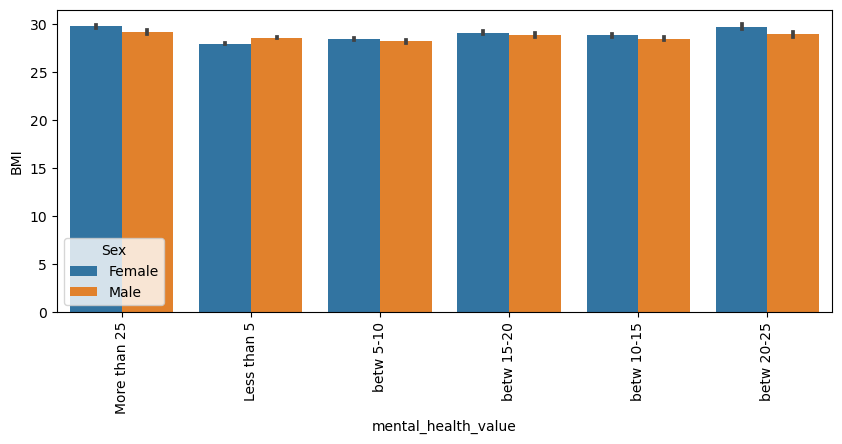

In [247]:
plt.figure(figsize=(10,4),dpi=100)
sns.barplot(x=data.mental_health_value,y=data.BMI,hue=data.Sex)
plt.xticks(rotation=90)
plt.show()

## Diff walking (difficulty walking)
* Walking abnormalities are abnormal, uncontrollable walking patterns. Genetics may cause them or other factors, such as diseases or injuries. Walking abnormalities can affect the muscles, bones, or nerves of the legs.

* Abnormalities may be present in the entire leg or in certain parts of the leg, such as the knee or ankle. Problems with the foot may also result in walking abnormalities.

* These can be temporary or long-term conditions, depending on their cause. Severe walking abnormalities may require continuous physical therapy and medical care.



In [128]:
pd.DataFrame(data.DiffWalking).value_counts()

DiffWalking
No             257362
Yes             44355
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


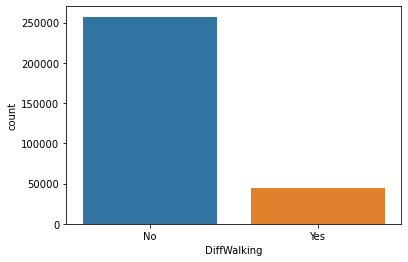

In [130]:
sns.countplot(data.DiffWalking)
plt.show()

### Diff Walking vs BMI


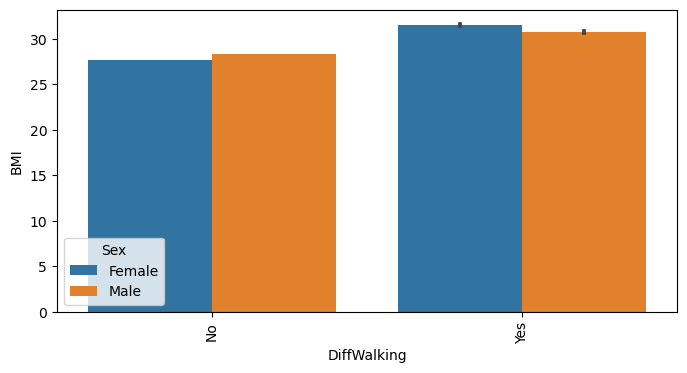

In [354]:
plt.figure(figsize=(8,4),dpi=100)
sns.barplot(x=data.DiffWalking,y=data.BMI,hue=data.Sex)
plt.xticks(rotation=90)
plt.show()

## Diabetic 
#### Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. 
##### Your risk for type 2 diabetes increases if you:

* are overweight
* are age 45 or older
* have a parent or sibling with the condition
* aren’t physically active
* have had gestational diabetes
* have prediabetes
* have high blood pressure, high cholesterol, or high triglycerides
* have African American, Hispanic or Latino American, Alaska Native, Pacific Islander, American Indian, or Asian American ancestry
###### Your risk for gestational diabetes increases if you:

* are overweight
* are over age 25
* had gestational diabetes during a past pregnancy
* have given birth to a baby weighing more than 9 pounds
* have a family history of type 2 diabetes
* have polycystic ovary syndrome (PCOS)




#### Complications faced by diabetic patients -
* increases the risk of various cardiovascular problems.
* coronary artery disease with chest pain (angina).
* Heart attack.
* Stroke.
* narrowing of arteries (atherosclerosis)
##### If you have diabetes, you're more likely to have heart disease or stroke. Nerve damage (neuropathy).

In [131]:
pd.DataFrame(data.Diabetic).value_counts()

Diabetic               
No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


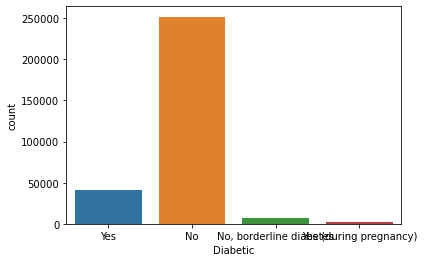

In [133]:
sns.countplot(data.Diabetic)
plt.show()

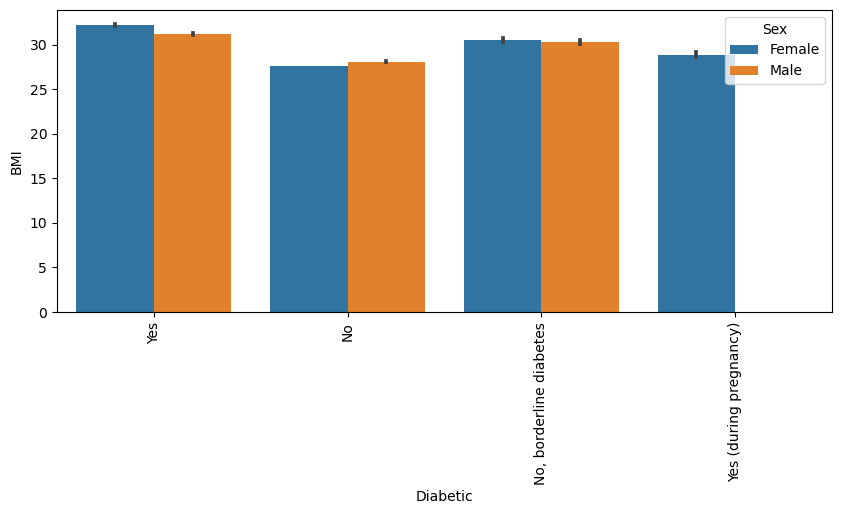

In [243]:
plt.figure(figsize=(10,4),dpi=100)

sns.barplot(x=data.Diabetic,y=data.BMI,hue=data.Sex)
plt.xticks(rotation=90)
plt.show()

## Physical activity
#### Physical activity refers to all movement. Popular ways to be active include walking, cycling, wheeling, sports, active recreation and play, and can be done at any level of skill and for enjoyment by everybody.
### Best physical activity:
* Walking
* Dancing
* Swimming
* Water aerobics
* Jogging and running
* Bicycle riding (stationary or on a path)
* Some gardening activities, such as raking and pushing a lawn mower
* Tennis
* Golfing (without a cart)
* stretching
* Yoga
* Heavy gardening (digging, shoveling)
* Lifting weights
* Push-ups on the floor or against the wall
* Sit-ups
* Working with resistance bands (long, wide rubber strips that stretch)
### Good effects of physical activity
* Improve your memory and brain function (all age groups).
* Protect against many chronic diseases.
* Aid in weight management.
* Lower blood pressure and improve heart health.
* Improve your quality of sleep.
* Reduce feelings of anxiety and depression.
* Combat cancer-related fatigue.
* Improve joint pain and stiffness.
* Maintain muscle strength and balance.
* Increase life span.


In [136]:
pd.DataFrame(data.PhysicalActivity).value_counts()

PhysicalActivity
Yes                 230412
No                   71305
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


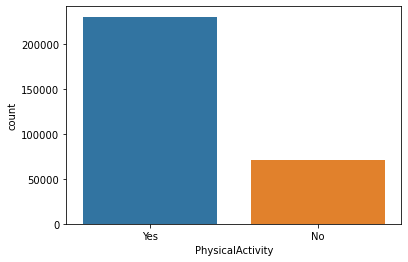

In [138]:
sns.countplot(data.PhysicalActivity)
plt.show()

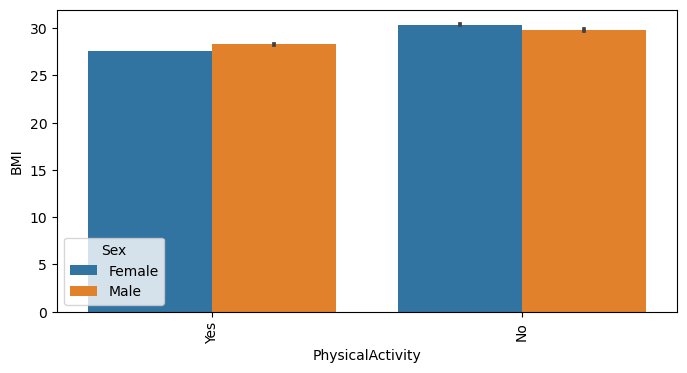

In [355]:
plt.figure(figsize=(8,4),dpi=100)
sns.barplot(x=data.PhysicalActivity,y=data.BMI,hue=data.Sex)
plt.xticks(rotation=90)
plt.show()

## Genhealth (General health)
#### The state of health of the body as a whole, or of a community.
* A person who has good physical health is likely to have bodily functions and processes working at their peak.
* This is not only due not only to an absence of disease.
* Regular exercise, balanced nutrition, and adequate rest all contribute to good health.


In [139]:
pd.DataFrame(data.GenHealth).value_counts()

GenHealth
Very good    104796
Good          91239
Excellent     59737
Fair          34659
Poor          11286
dtype: int64

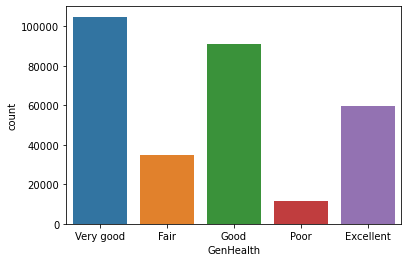

In [140]:
sns.countplot(x=data['GenHealth'])
plt.show()

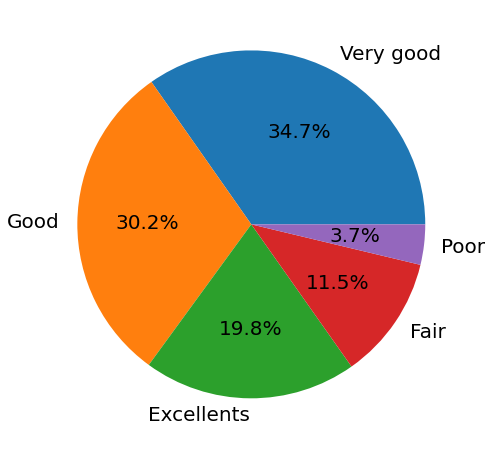

In [142]:
plt.figure(figsize=(12,8))
gen_health=pd.DataFrame(data.GenHealth).value_counts()
gen_health_labels=['Very good','Good','Excellents','Fair','Poor']
plt.pie(gen_health,labels=gen_health_labels,autopct='%1.1f%%',textprops={'fontsize':20,'color':'black'})
plt.show()

### Gen Health vs BMI

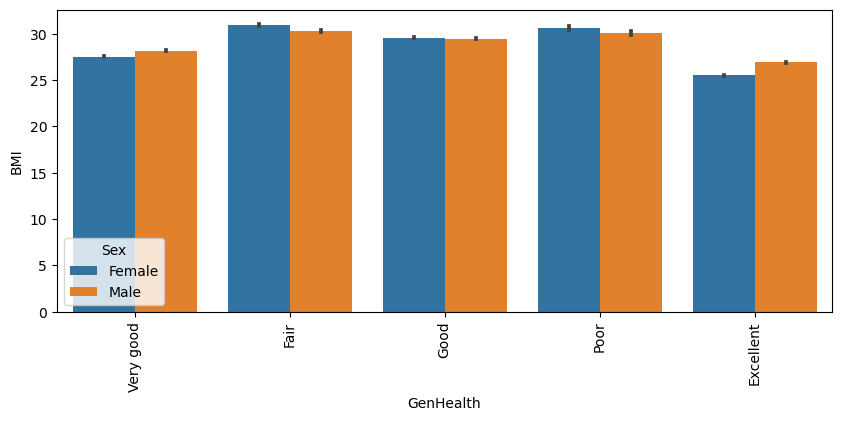

In [255]:
plt.figure(figsize=(10,4),dpi=100)
sns.barplot(x=data.GenHealth,y=data.BMI,hue=data.Sex)
plt.xticks(rotation=90)
plt.show()

## Sleep
##### Sleep powers the mind, restores the body, and fortifies virtually every system in the body
###### Sleep mearsure
* Newborn (0-3months old) == 14-17 hours
* Infant  (4-11 months old)==12-15 hours
* Toddler(1-2 years old)==11-14 hours
* Preschool(3-5 years old)==10-13 hours
* School-age (6-13 years old)==9-11 hours
* Teens (14-17 years old)==8-10 hours
* Young Adults (18-25 years old)==7-9 hours
* Adult(26-64 years old)==7-9 hours
* Older Adult(65+)==7-8 hours


#### Benifits of good sleep
* Sleep Can Boost Your Immune System
* Gaining Zzz’s Can Help Prevent Weight Gain

* Sleep Can Strengthen Your Heart

* Better Sleep = Better Mood
* Sleeping Can Increase Productivity
* Lack of Sleep Can Be Dangerous.
* Sleep Can Increase Exercise Performance
* Sleep Improves Memory

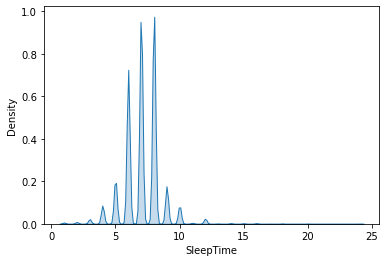

In [145]:
sns.kdeplot(x='SleepTime',data=data,shade=True)
plt.show()

In [146]:
def sleep_time_period(x):
    if x<6:
        return "less than 6 hours"
    if x==6:
        return " 6 hours"
    if x==7:
        return "7 hours"
    if x==8:
        return "8 hours"
    if x>8:
        return "More than 8 hours"
data['sleep_time_period']=data['SleepTime'].apply(sleep_time_period)
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_classifiaction,physical_health_value,mental_health_value,sleep_time_period
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,...,Yes,Very good,5.0,Yes,No,Yes,under weight,Less than 5,More than 25,less than 6 hours
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,...,Yes,Very good,7.0,No,No,No,Healthy,Less than 5,Less than 5,7 hours
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,...,Yes,Fair,8.0,Yes,No,No,Over weight,betw 20-25,More than 25,8 hours
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,...,No,Good,6.0,No,No,Yes,Healthy,Less than 5,Less than 5,6 hours
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,...,Yes,Very good,8.0,No,No,No,Healthy,More than 25,Less than 5,8 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,...,No,Fair,6.0,Yes,No,No,Over weight,betw 5-10,Less than 5,6 hours
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,...,Yes,Very good,5.0,Yes,No,No,Over weight,Less than 5,Less than 5,less than 6 hours
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,...,Yes,Good,6.0,No,No,No,Healthy,Less than 5,Less than 5,6 hours
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,...,No,Good,12.0,No,No,No,Above Obese,Less than 5,Less than 5,More than 8 hours


In [148]:
pd.DataFrame(data.sleep_time_period).value_counts()

sleep_time_period
8 hours              90202
7 hours              89445
 6 hours             64655
less than 6 hours    30162
More than 8 hours    27253
dtype: int64

In [356]:
pd.DataFrame(data.sleep_time_period).value_counts(normalize=True)

sleep_time_period
8 hours              0.298962
7 hours              0.296453
 6 hours             0.214290
less than 6 hours    0.099968
More than 8 hours    0.090326
dtype: float64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


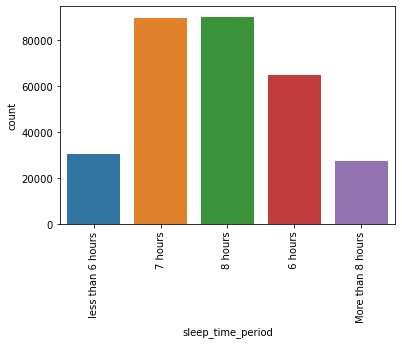

In [149]:
sns.countplot(data.sleep_time_period)
plt.xticks(rotation=90)
plt.show()

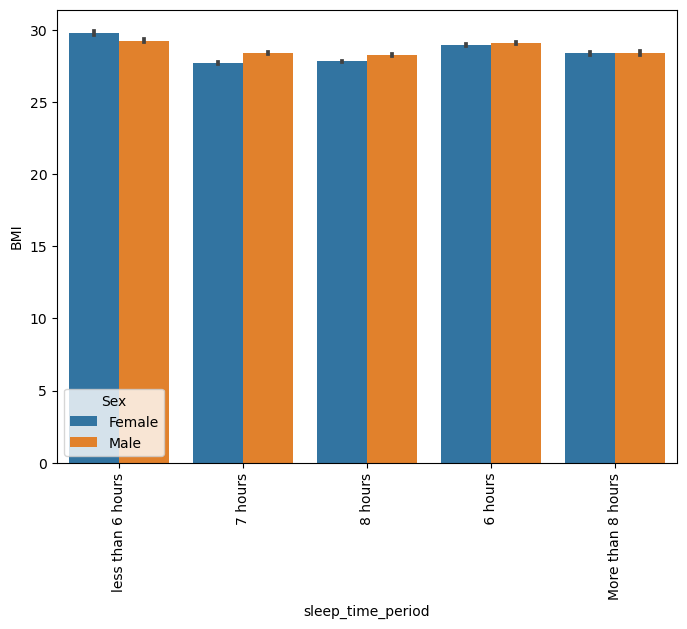

In [357]:
plt.figure(figsize=(8,6),dpi=100)
sns.barplot(x=data.sleep_time_period,y=data.BMI,hue=data.Sex)
plt.xticks(rotation=90)
plt.show()

### Age Category

In [150]:
pd.DataFrame(data.AgeCategory).value_counts()

AgeCategory
65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


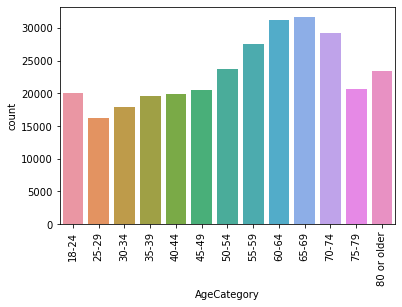

In [154]:
sns.countplot(data.AgeCategory,order=('18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older'))
plt.xticks(rotation=90)
plt.show()

### Age Category vs BMI

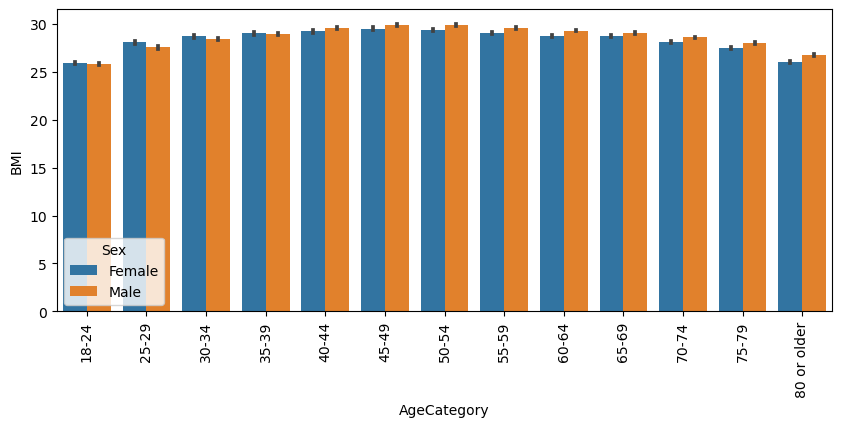

In [254]:
plt.figure(figsize=(10,4),dpi=100)
sns.barplot(x=data.AgeCategory,y=data.BMI,hue=data.Sex,order=('18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older'))
plt.xticks(rotation=90)
plt.show()

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


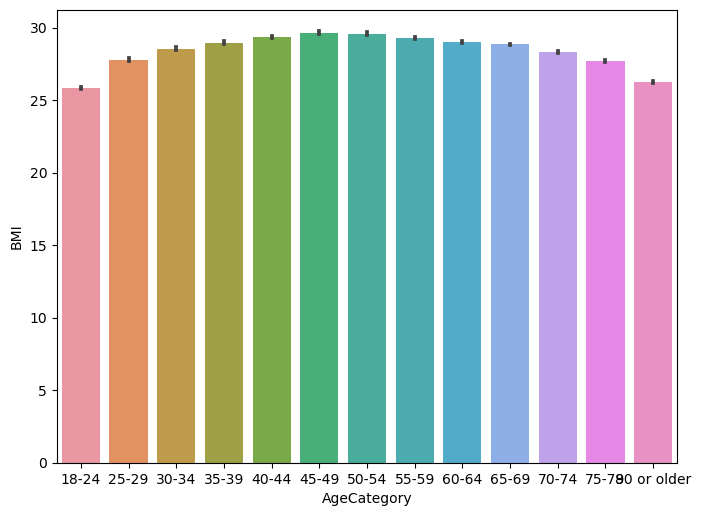

In [358]:
plt.figure(figsize=(8,6),dpi=100)
sns.barplot(data.AgeCategory,data.BMI,order=('18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older'))
plt.show()

### Race

In [158]:
data.Race.describe()

count     301717
unique         6
top        White
freq      227724
Name: Race, dtype: object

In [159]:
data.Race.unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [160]:
pd.DataFrame(data.Race).value_counts()

Race                          
White                             227724
Hispanic                           27107
Black                              22810
Other                              10891
Asian                               7993
American Indian/Alaskan Native      5192
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


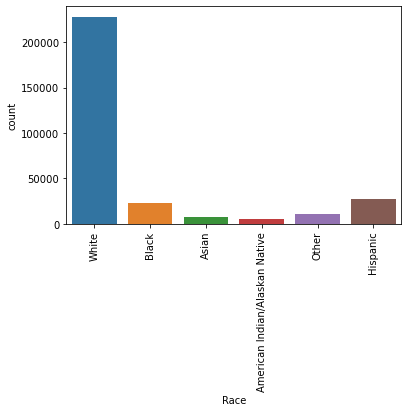

In [161]:
sns.countplot(data.Race)
plt.xticks(rotation=90)
plt.show()

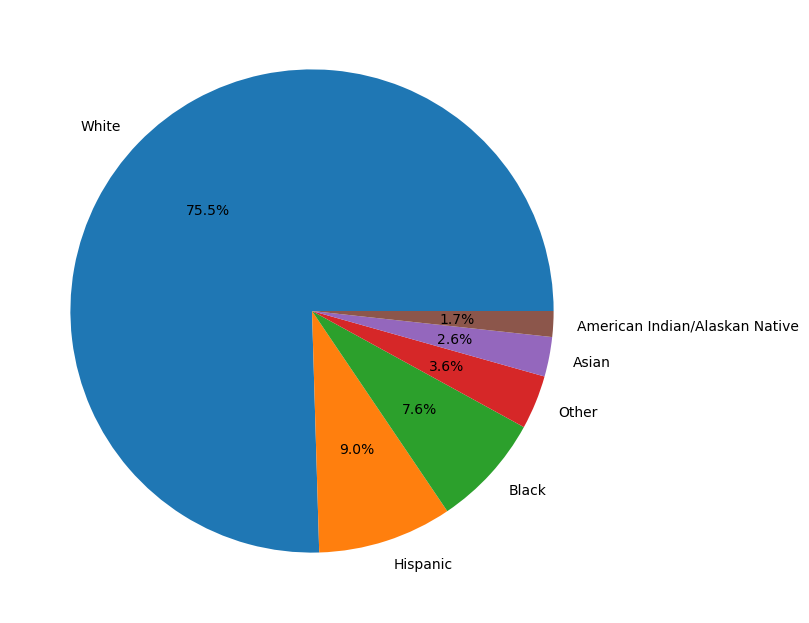

In [162]:
plt.figure(figsize=(12,8),dpi=100)
race=pd.DataFrame(data.Race).value_counts()
race_label=('White','Hispanic','Black','Other','Asian','American Indian/Alaskan Native')
plt.pie(race,labels=race_label,autopct='%1.1f%%',textprops={'fontsize':10,'color':'black'})
plt.show()

In [163]:
data.groupby('Race').BMI_classifiaction.value_counts()

Race                            BMI_classifiaction
American Indian/Alaskan Native  Above Obese            2145
                                Over weight            1737
                                Healthy                1201
                                under weight             75
Asian                           Healthy                3889
                                Over weight            2690
                                Above Obese            1074
                                under weight            308
Black                           Above Obese           10042
                                Over weight            7387
                                Healthy                4949
                                under weight            270
Hispanic                        Over weight            9791
                                Above Obese            9607
                                Healthy                7113
                                under weight     

## Asthma
#### Asthma is a condition in which your airways narrow and swell and may produce extra mucus. This can make breathing difficult and trigger coughing, a whistling sound (wheezing) when you breathe out and shortness of breath.
* exposure to tobacco smoke can lead to asthma.
* other environmental conditions can also affect the condition.

In [165]:
pd.DataFrame(data.Asthma).value_counts()

Asthma
No        259066
Yes        42651
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


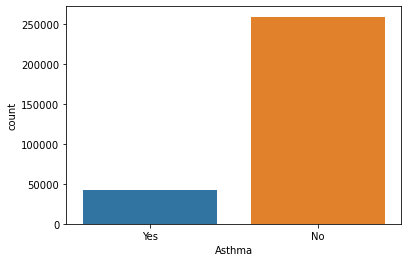

In [167]:
sns.countplot(data.Asthma)
plt.show()

### Asthma vs BMI

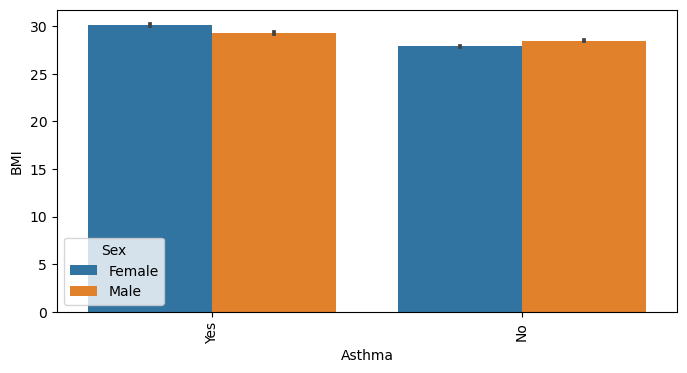

In [359]:
plt.figure(figsize=(8,4),dpi=100)
sns.barplot(x=data.Asthma,y=data.BMI,hue=data.Sex)
plt.xticks(rotation=90)
plt.show()

## Kidney disease 
#### Kidney disease means your kidneys are damaged and can't filter blood the way they should.
### What are the risk factors of chronic kidney disease?

* have diabetes
* have high blood pressure
* have a family history of kidney failure
* are older
* belong to a population group with a high rate of diabetes or high blood pressure, such as African Americans, Hispanic Americans, Asian, Pacific Islanders, and American Indians
#### Risk factors
* Diabetes
* High blood pressure
* Heart (cardiovascular) disease
* Smoking
* Obesity
* Being Black, Native American or Asian American
* Family history of kidney disease
* Abnormal kidney structure
* Older age
* Frequent use of medications that can damage the kidneys


In [169]:
pd.DataFrame(data.KidneyDisease).value_counts()

KidneyDisease
No               289941
Yes               11776
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


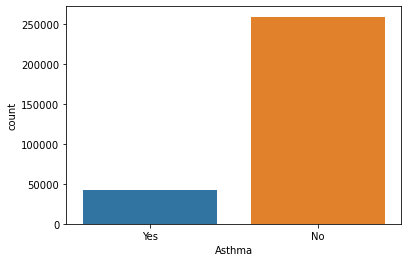

In [170]:
sns.countplot(data.Asthma)
plt.show()

### Kidney Disease Vs BMI

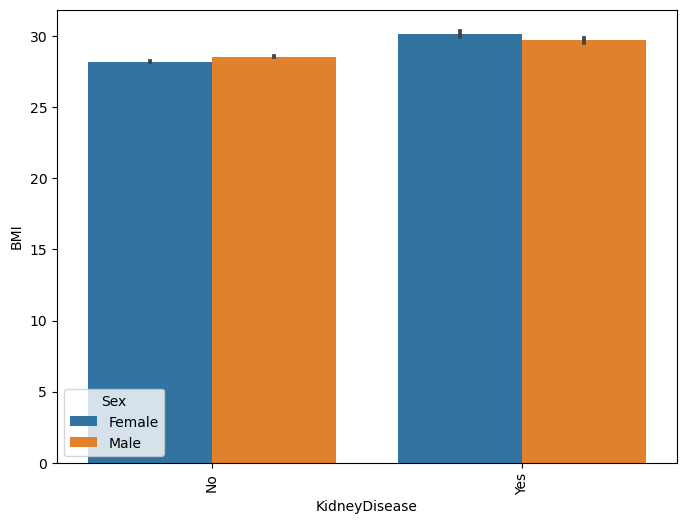

In [360]:
plt.figure(figsize=(8,6),dpi=100)
sns.barplot(x=data.KidneyDisease,y=data.BMI,hue=data.Sex)
plt.xticks(rotation=90)
plt.show()

## Skin cancer
#### The abnormal growth of skin cells

In [171]:
pd.DataFrame(data.SkinCancer).value_counts()

SkinCancer
No            272425
Yes            29292
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


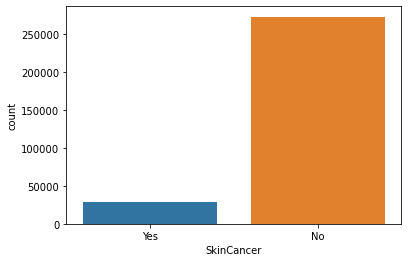

In [172]:
sns.countplot(data.SkinCancer)
plt.show()

### Skin Cancer vs BMI

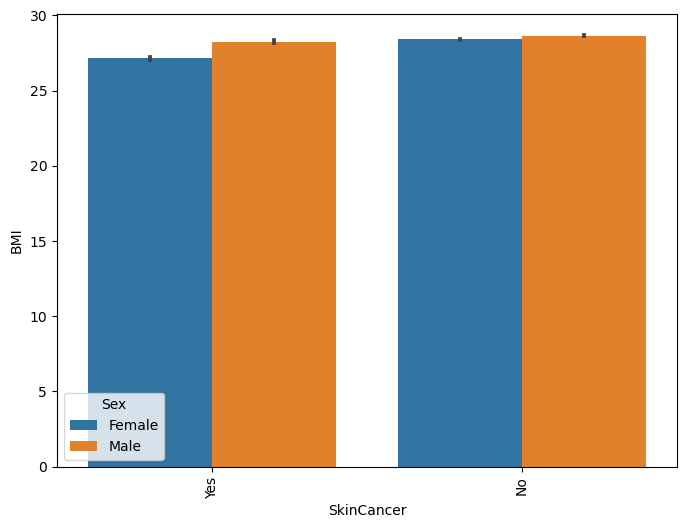

In [361]:
plt.figure(figsize=(8,6),dpi=100)
sns.barplot(x=data.SkinCancer,y=data.BMI,hue=data.Sex)
plt.xticks(rotation=90)
plt.show()

In [173]:
sns.set_style()

In [174]:
data


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_classifiaction,physical_health_value,mental_health_value,sleep_time_period
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,...,Yes,Very good,5.0,Yes,No,Yes,under weight,Less than 5,More than 25,less than 6 hours
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,...,Yes,Very good,7.0,No,No,No,Healthy,Less than 5,Less than 5,7 hours
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,...,Yes,Fair,8.0,Yes,No,No,Over weight,betw 20-25,More than 25,8 hours
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,...,No,Good,6.0,No,No,Yes,Healthy,Less than 5,Less than 5,6 hours
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,...,Yes,Very good,8.0,No,No,No,Healthy,More than 25,Less than 5,8 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,...,No,Fair,6.0,Yes,No,No,Over weight,betw 5-10,Less than 5,6 hours
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,...,Yes,Very good,5.0,Yes,No,No,Over weight,Less than 5,Less than 5,less than 6 hours
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,...,Yes,Good,6.0,No,No,No,Healthy,Less than 5,Less than 5,6 hours
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,...,No,Good,12.0,No,No,No,Above Obese,Less than 5,Less than 5,More than 8 hours


In [195]:
data.groupby("Race").mean().sort_values(by='BMI',ascending=True)

,BMI,PhysicalHealth,MentalHealth,SleepTime
Race,,,,
Asian,25.228775,1.645940,2.781309,6.916302
White,28.289153,3.610002,4.068399,7.117634
Other,28.761688,4.066110,5.242035,6.859058
Hispanic,28.849669,3.267495,4.239385,7.030066
American Indian/Alaskan Native,29.633581,4.800270,5.046032,7.056240
Black,30.185184,3.717843,4.235379,6.992196


### Alcohol Drinking vs  BMI

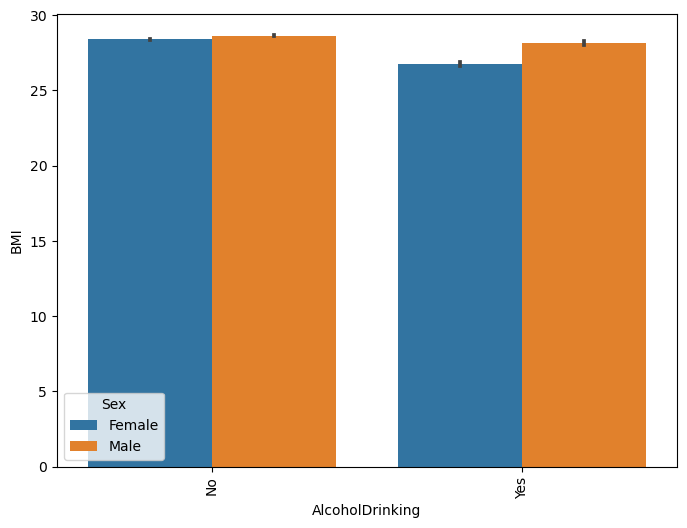

In [362]:
plt.figure(figsize=(8,6),dpi=100)
sns.barplot(x=data.AlcoholDrinking,y=data.BMI,hue=data.Sex)
plt.xticks(rotation=90)
plt.show()

### People with Heart Disease

In [241]:
heartdisease=data[data['HeartDisease']=='Yes']
heartdisease

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_classifiaction,physical_health_value,mental_health_value,sleep_time_period
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,...,No,Fair,12.0,No,No,No,Over weight,betw 5-10,Less than 5,More than 8 hours
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,...,No,Poor,15.0,Yes,No,No,Above Obese,More than 25,Less than 5,More than 8 hours
35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,...,Yes,Poor,4.0,No,No,Yes,Above Obese,betw 10-15,Less than 5,less than 6 hours
42,Yes,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,...,No,Good,7.0,No,No,Yes,Over weight,Less than 5,Less than 5,7 hours
43,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,...,Yes,Fair,8.0,No,Yes,No,Above Obese,betw 5-10,Less than 5,8 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319765,Yes,38.45,No,No,Yes,30.0,15.0,Yes,Female,55-59,...,Yes,Poor,6.0,Yes,No,No,Above Obese,More than 25,betw 15-20,6 hours
319767,Yes,36.21,Yes,No,No,0.0,0.0,Yes,Female,75-79,...,Yes,Good,8.0,No,No,No,Above Obese,Less than 5,Less than 5,8 hours
319781,Yes,37.12,Yes,No,No,0.0,0.0,No,Male,35-39,...,Yes,Very good,7.0,No,No,No,Above Obese,Less than 5,Less than 5,7 hours
319786,Yes,33.20,Yes,No,No,0.0,0.0,No,Female,60-64,...,Yes,Very good,8.0,Yes,No,No,Above Obese,Less than 5,Less than 5,8 hours


In [262]:
pd.DataFrame(heartdisease.HeartDisease).value_counts()

HeartDisease
Yes             27261
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Smoking', ylabel='count'>

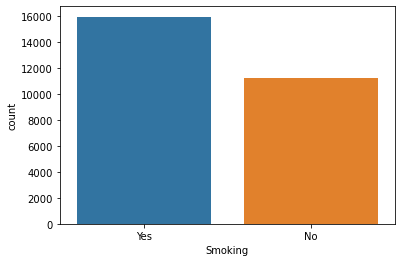

In [263]:
sns.countplot(heartdisease.Smoking)

In [264]:
pd.DataFrame(heartdisease.AgeCategory).value_counts()

AgeCategory
80 or older    5426
70-74          4817
65-69          4074
75-79          4027
60-64          3321
55-59          2199
50-54          1383
45-49           743
40-44           486
35-39           296
30-34           226
25-29           133
18-24           130
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

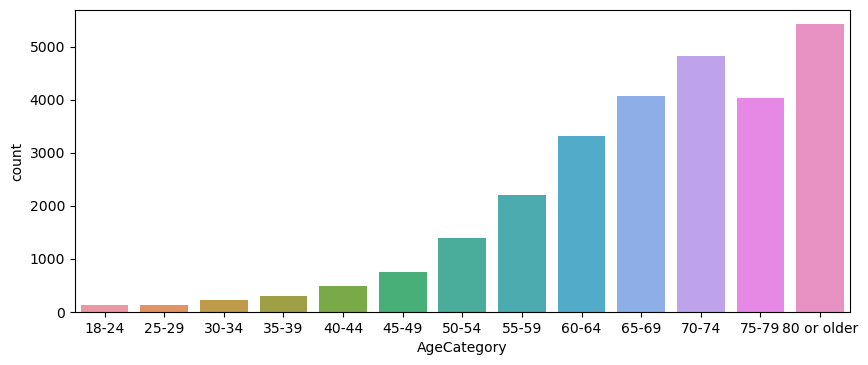

In [268]:
plt.figure(figsize=(10,4),dpi=100)
sns.countplot(heartdisease.AgeCategory,order=('18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older'))


In [269]:
pd.DataFrame(heartdisease.Race).value_counts()

Race                          
White                             22395
Black                              1729
Hispanic                           1443
Other                               886
American Indian/Alaskan Native      542
Asian                               266
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


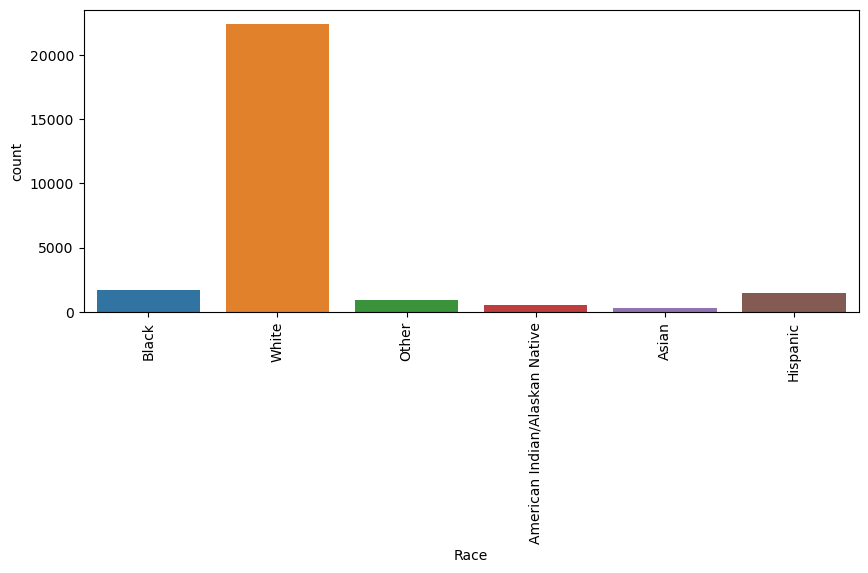

In [363]:
plt.figure(figsize=(10,4),dpi=100)
sns.countplot(heartdisease.Race)
plt.xticks(rotation=90)
plt.show()

In [273]:
pd.DataFrame(heartdisease.GenHealth).value_counts()

GenHealth
Good         9505
Fair         7083
Very good    5328
Poor         3850
Excellent    1495
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


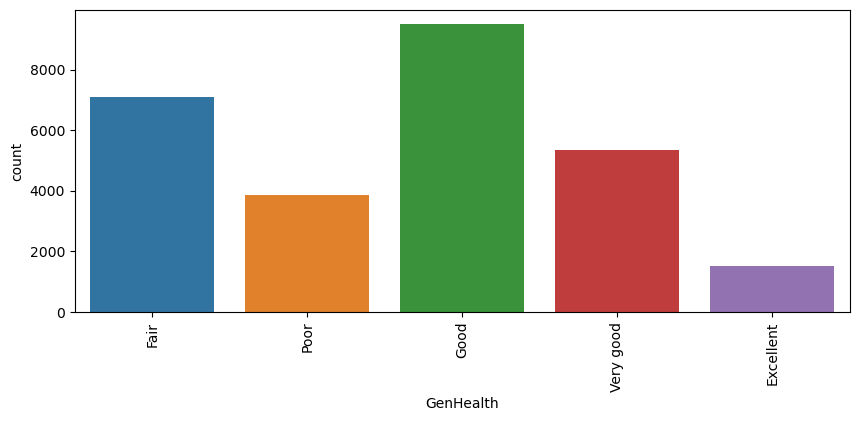

In [364]:
plt.figure(figsize=(10,4),dpi=100)
sns.countplot(heartdisease.GenHealth)
plt.xticks(rotation=90)
plt.show()

### People with somking problem


In [276]:
smoking=data[data['Smoking']=='Yes']
smoking

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_classifiaction,physical_health_value,mental_health_value,sleep_time_period
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,...,Yes,Very good,5.0,Yes,No,Yes,under weight,Less than 5,More than 25,less than 6 hours
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,...,Yes,Fair,8.0,Yes,No,No,Over weight,betw 20-25,More than 25,8 hours
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,...,No,Fair,12.0,No,No,No,Over weight,betw 5-10,Less than 5,More than 8 hours
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,...,No,Good,9.0,Yes,No,No,Above Obese,betw 5-10,Less than 5,More than 8 hours
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,...,No,Poor,15.0,Yes,No,No,Above Obese,More than 25,Less than 5,More than 8 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319782,No,31.89,Yes,No,No,30.0,30.0,Yes,Female,55-59,...,No,Fair,4.0,No,No,No,Above Obese,More than 25,More than 25,less than 6 hours
319784,No,26.58,Yes,No,No,0.0,0.0,Yes,Male,75-79,...,Yes,Good,6.0,No,No,No,Over weight,Less than 5,Less than 5,6 hours
319786,Yes,33.20,Yes,No,No,0.0,0.0,No,Female,60-64,...,Yes,Very good,8.0,Yes,No,No,Above Obese,Less than 5,Less than 5,8 hours
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,...,No,Fair,6.0,Yes,No,No,Over weight,betw 5-10,Less than 5,6 hours


In [277]:
pd.DataFrame(smoking.HeartDisease).value_counts()

HeartDisease
No              111428
Yes              15977
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

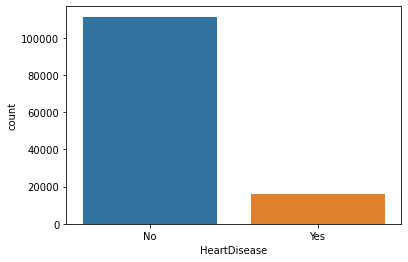

In [278]:
sns.countplot(smoking.HeartDisease)

In [279]:
pd.DataFrame(smoking.AgeCategory).value_counts()

AgeCategory
65-69          14810
60-64          14749
70-74          14263
55-59          12244
75-79          10459
80 or older    10324
50-54           9646
40-44           8760
45-49           8433
35-39           8370
30-34           7005
25-29           5086
18-24           3256
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


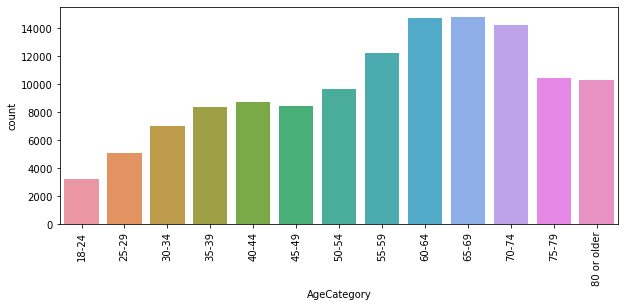

In [282]:
plt.figure(figsize=(10,4))
sns.countplot(smoking.AgeCategory,order=('18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older'))
plt.xticks(rotation=90)
plt.show()

In [283]:
pd.DataFrame(smoking.Race).value_counts()



Race                          
White                             101524
Hispanic                            8335
Black                               7890
Other                               4968
American Indian/Alaskan Native      2852
Asian                               1836
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


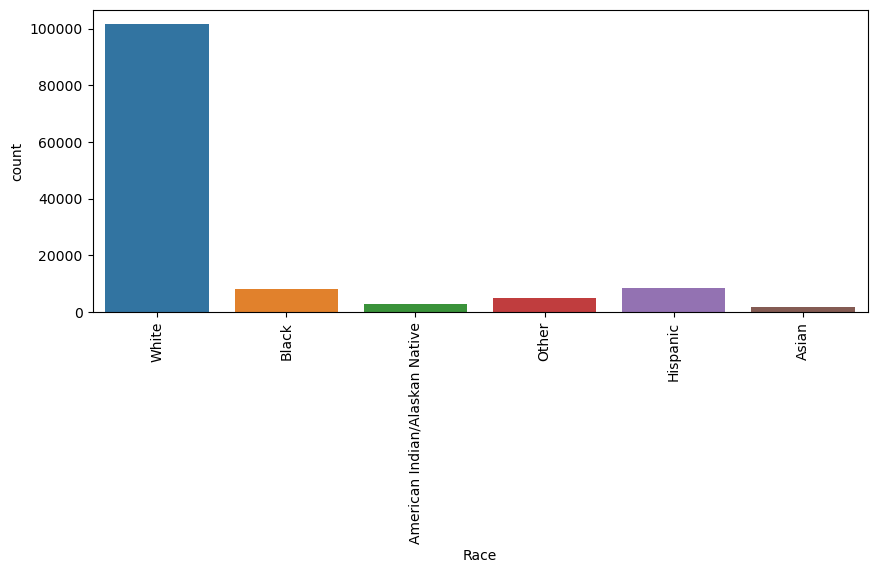

In [286]:
plt.figure(figsize=(10,4),dpi=100)
sns.countplot(smoking.Race)
plt.xticks(rotation=90)
plt.show()

In [287]:
pd.DataFrame(smoking.GenHealth).value_counts()


GenHealth
Good         41950
Very good    40445
Fair         18976
Excellent    18866
Poor          7168
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


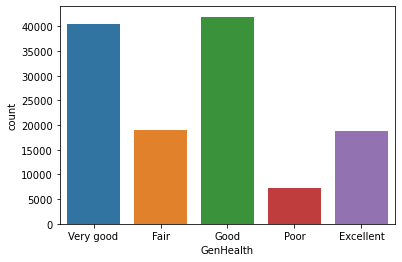

In [365]:
sns.countplot(smoking.GenHealth)
plt.show()

In [289]:
pd.DataFrame(smoking.BMI_classifiaction).value_counts()


BMI_classifiaction
Over weight           45526
Above Obese           43201
Healthy               35583
under weight           2297
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


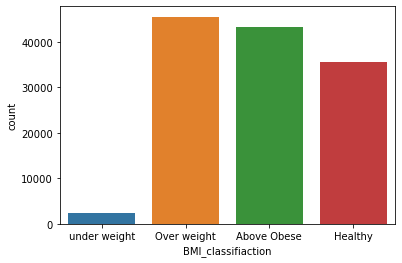

In [366]:
sns.countplot(smoking.BMI_classifiaction)
plt.show()

In [291]:
pd.DataFrame(smoking.physical_health_value).value_counts()


physical_health_value
Less than 5              98687
More than 25             12688
betw 5-10                 6501
betw 10-15                4362
betw 15-20                2940
betw 20-25                2227
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


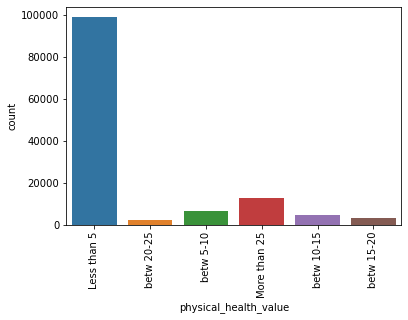

In [294]:
sns.countplot(smoking.physical_health_value)
plt.xticks(rotation=90)
plt.show()

In [295]:
pd.DataFrame(smoking.mental_health_value).value_counts()


mental_health_value
Less than 5            93449
More than 25           11406
betw 5-10               8853
betw 10-15              5819
betw 15-20              4917
betw 20-25              2961
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


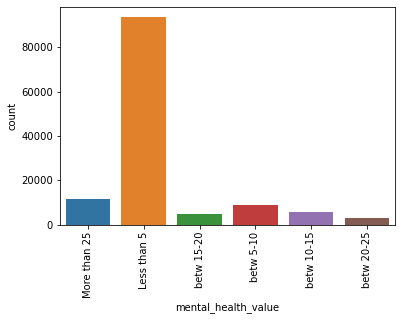

In [296]:
sns.countplot(smoking.mental_health_value)
plt.xticks(rotation=90)
plt.show()

### People with stroke

In [297]:
stroke=data[data['Stroke']=='Yes']

In [298]:
stroke

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_classifiaction,physical_health_value,mental_health_value,sleep_time_period
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,...,Yes,Very good,7.0,No,No,No,Healthy,Less than 5,Less than 5,7 hours
35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,...,Yes,Poor,4.0,No,No,Yes,Above Obese,betw 10-15,Less than 5,less than 6 hours
40,No,22.60,Yes,No,Yes,0.0,10.0,No,Female,55-59,...,No,Very good,8.0,No,No,No,Healthy,Less than 5,betw 10-15,8 hours
49,No,27.46,Yes,No,Yes,15.0,0.0,No,Male,75-79,...,Yes,Poor,8.0,No,No,No,Over weight,betw 15-20,Less than 5,8 hours
59,No,27.20,Yes,No,Yes,0.0,0.0,No,Male,80 or older,...,No,Very good,8.0,No,No,Yes,Over weight,Less than 5,Less than 5,8 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319588,No,30.56,No,No,Yes,21.0,2.0,Yes,Male,50-54,...,Yes,Good,8.0,No,No,No,Above Obese,betw 20-25,Less than 5,8 hours
319619,Yes,39.31,No,No,Yes,3.0,0.0,Yes,Female,65-69,...,No,Fair,4.0,Yes,Yes,No,Above Obese,Less than 5,Less than 5,less than 6 hours
319620,Yes,27.64,No,No,Yes,1.0,0.0,Yes,Male,50-54,...,Yes,Good,6.0,No,Yes,No,Over weight,Less than 5,Less than 5,6 hours
319740,No,26.07,No,No,Yes,0.0,0.0,No,Female,60-64,...,No,Good,6.0,No,No,No,Over weight,Less than 5,Less than 5,6 hours


In [299]:
pd.DataFrame(stroke.AgeCategory).value_counts()

AgeCategory
80 or older    2298
70-74          1889
75-79          1709
65-69          1704
60-64          1483
55-59          1101
50-54           685
45-49           427
40-44           293
35-39           193
30-34           131
25-29            90
18-24            61
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


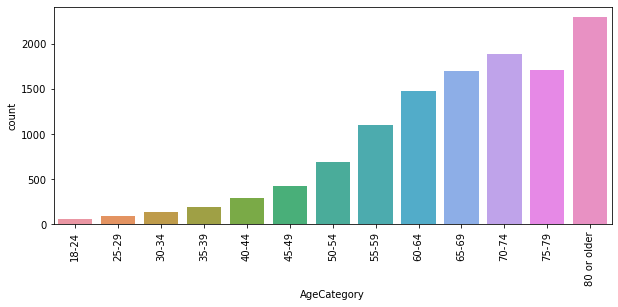

In [301]:
plt.figure(figsize=(10,4))
sns.countplot(stroke.AgeCategory,order=('18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older'))
plt.xticks(rotation=90)
plt.show()

In [302]:
pd.DataFrame(stroke.GenHealth).value_counts()

GenHealth
Good         3876
Fair         3298
Very good    2270
Poor         1929
Excellent     691
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GenHealth', ylabel='count'>

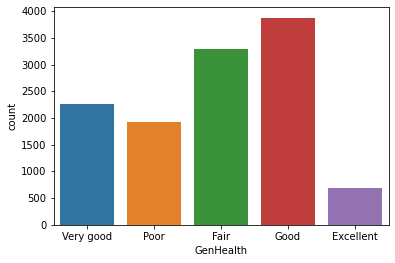

In [303]:
sns.countplot(stroke.GenHealth)

In [304]:
pd.DataFrame(stroke.BMI_classifiaction).value_counts()

BMI_classifiaction
Above Obese           4436
Over weight           4283
Healthy               3001
under weight           255
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


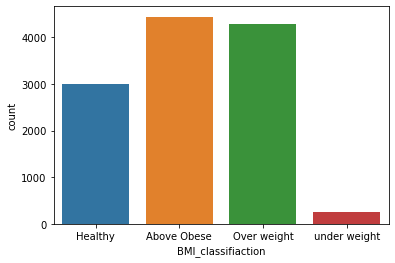

In [367]:
sns.countplot(stroke.BMI_classifiaction)
plt.show()

In [306]:
pd.DataFrame(stroke.physical_health_value).value_counts()

physical_health_value
Less than 5              7160
More than 25             2545
betw 5-10                 789
betw 10-15                626
betw 15-20                509
betw 20-25                435
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


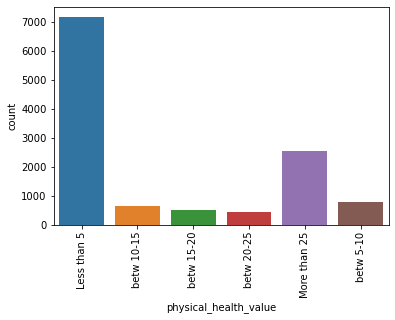

In [307]:
sns.countplot(stroke.physical_health_value)
plt.xticks(rotation=90)
plt.show()

In [308]:
pd.DataFrame(stroke.mental_health_value).value_counts()

mental_health_value
Less than 5            8526
More than 25           1438
betw 5-10               742
betw 10-15              525
betw 15-20              517
betw 20-25              316
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


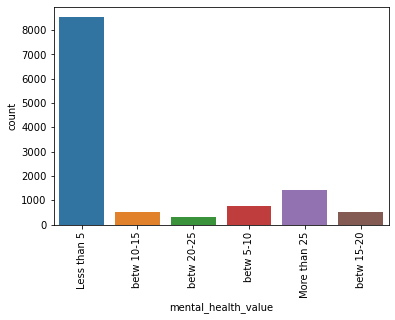

In [309]:
sns.countplot(stroke.mental_health_value)
plt.xticks(rotation=90)
plt.show()

### People suffering from Asthma

In [310]:
asthma=data[data['Asthma']=='Yes']
asthma

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_classifiaction,physical_health_value,mental_health_value,sleep_time_period
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,...,Yes,Very good,5.0,Yes,No,Yes,under weight,Less than 5,More than 25,less than 6 hours
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,...,Yes,Fair,8.0,Yes,No,No,Over weight,betw 20-25,More than 25,8 hours
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,...,Yes,Fair,4.0,Yes,No,Yes,Healthy,betw 15-20,Less than 5,less than 6 hours
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,...,No,Good,9.0,Yes,No,No,Above Obese,betw 5-10,Less than 5,More than 8 hours
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,...,No,Poor,15.0,Yes,No,No,Above Obese,More than 25,Less than 5,More than 8 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319761,Yes,29.43,No,No,No,7.0,0.0,Yes,Male,45-49,...,Yes,Good,6.0,Yes,No,No,Over weight,betw 5-10,Less than 5,6 hours
319765,Yes,38.45,No,No,Yes,30.0,15.0,Yes,Female,55-59,...,Yes,Poor,6.0,Yes,No,No,Above Obese,More than 25,betw 15-20,6 hours
319786,Yes,33.20,Yes,No,No,0.0,0.0,No,Female,60-64,...,Yes,Very good,8.0,Yes,No,No,Above Obese,Less than 5,Less than 5,8 hours
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,...,No,Fair,6.0,Yes,No,No,Over weight,betw 5-10,Less than 5,6 hours


In [311]:
pd.DataFrame(asthma.AgeCategory).value_counts()

AgeCategory
60-64          4476
65-69          4102
55-59          3911
18-24          3709
70-74          3657
50-54          3456
45-49          3102
40-44          3048
35-39          2862
25-29          2856
30-34          2835
75-79          2398
80 or older    2239
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


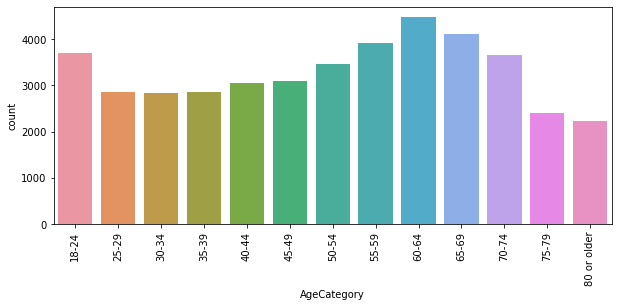

In [312]:
plt.figure(figsize=(10,4))
sns.countplot(asthma.AgeCategory,order=('18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older'))
plt.xticks(rotation=90)
plt.show()

In [315]:
pd.DataFrame(asthma.GenHealth).value_counts()

GenHealth
Good         13736
Very good    12823
Fair          7519
Excellent     5376
Poor          3197
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


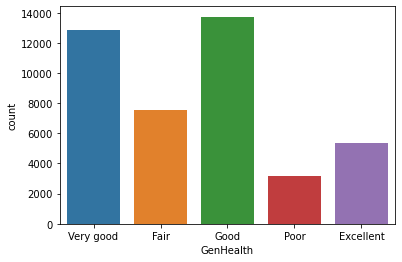

In [368]:
sns.countplot(asthma.GenHealth)
plt.show()

In [317]:
pd.DataFrame(asthma.BMI_classifiaction).value_counts()

BMI_classifiaction
Above Obese           17645
Over weight           13451
Healthy               10603
under weight            683
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


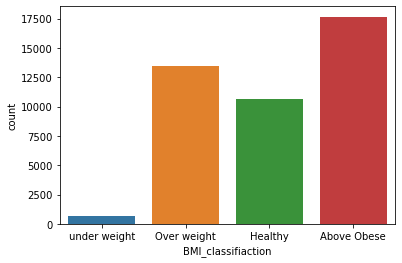

In [369]:
sns.countplot(asthma.BMI_classifiaction)
plt.show()

In [318]:
pd.DataFrame(asthma.physical_health_value).value_counts()

physical_health_value
Less than 5              30364
More than 25              5090
betw 5-10                 2836
betw 10-15                1986
betw 15-20                1350
betw 20-25                1025
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


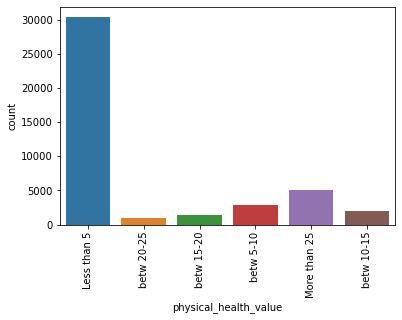

In [322]:
sns.countplot(asthma.physical_health_value)
plt.xticks(rotation=90)
plt.show()

In [319]:
pd.DataFrame(asthma.mental_health_value).value_counts()

mental_health_value
Less than 5            27884
More than 25            4758
betw 5-10               3857
betw 10-15              2585
betw 15-20              2228
betw 20-25              1339
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


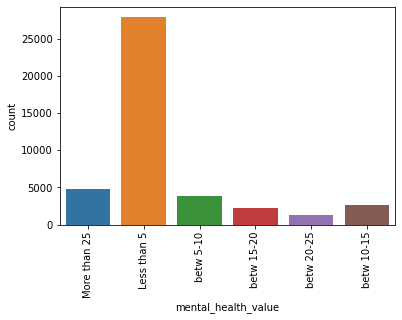

In [323]:
sns.countplot(asthma.mental_health_value)
plt.xticks(rotation=90)
plt.show()

### People suffering from kidney disease

In [324]:
kidney_disease=data[data['KidneyDisease']=='Yes']
kidney_disease

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_classifiaction,physical_health_value,mental_health_value,sleep_time_period
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,...,No,Fair,5.0,No,Yes,No,Over weight,Less than 5,Less than 5,less than 6 hours
18,No,29.86,Yes,No,No,0.0,0.0,Yes,Female,75-79,...,No,Fair,5.0,No,Yes,No,Over weight,Less than 5,Less than 5,less than 6 hours
39,No,21.93,No,No,No,3.0,2.0,No,Female,70-74,...,Yes,Fair,4.0,No,Yes,No,Healthy,Less than 5,Less than 5,less than 6 hours
43,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,...,Yes,Fair,8.0,No,Yes,No,Above Obese,betw 5-10,Less than 5,8 hours
65,No,26.63,No,No,No,20.0,0.0,No,Female,65-69,...,Yes,Fair,6.0,No,Yes,No,Over weight,betw 20-25,Less than 5,6 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319735,No,31.44,No,No,No,10.0,0.0,No,Female,75-79,...,Yes,Fair,5.0,No,Yes,No,Above Obese,betw 10-15,Less than 5,less than 6 hours
319738,No,37.59,Yes,No,No,0.0,0.0,Yes,Male,60-64,...,No,Fair,8.0,No,Yes,No,Above Obese,Less than 5,Less than 5,8 hours
319739,Yes,35.02,No,No,No,15.0,0.0,No,Male,60-64,...,Yes,Fair,8.0,No,Yes,No,Above Obese,betw 15-20,Less than 5,8 hours
319745,No,22.83,No,No,No,3.0,0.0,Yes,Female,70-74,...,No,Fair,8.0,Yes,Yes,No,Healthy,Less than 5,Less than 5,8 hours


In [325]:
pd.DataFrame(kidney_disease.AgeCategory).value_counts()

AgeCategory
70-74          1968
80 or older    1967
65-69          1689
75-79          1599
60-64          1372
55-59           997
50-54           700
45-49           451
40-44           366
35-39           256
30-34           164
18-24           132
25-29           115
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


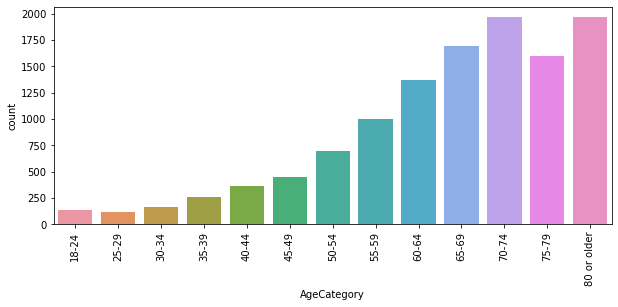

In [326]:
plt.figure(figsize=(10,4))
sns.countplot(kidney_disease.AgeCategory,order=('18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older'))
plt.xticks(rotation=90)
plt.show()

In [327]:
pd.DataFrame(kidney_disease.GenHealth).value_counts()

GenHealth
Good         3876
Fair         3284
Very good    2063
Poor         1962
Excellent     591
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


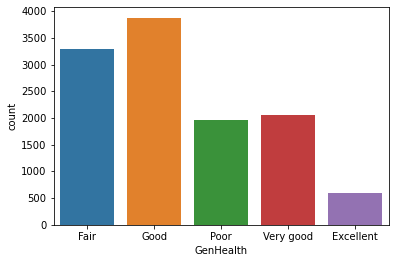

In [370]:
sns.countplot(kidney_disease.GenHealth)
plt.show()

In [329]:
pd.DataFrame(kidney_disease.BMI_classifiaction).value_counts()

BMI_classifiaction
Above Obese           5043
Over weight           3854
Healthy               2600
under weight           202
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


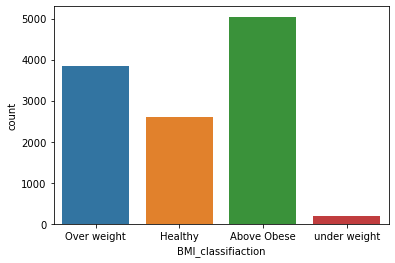

In [371]:
sns.countplot(kidney_disease.BMI_classifiaction)
plt.show()

In [331]:
pd.DataFrame(kidney_disease.physical_health_value).value_counts()

physical_health_value
Less than 5              6861
More than 25             2593
betw 5-10                 775
betw 10-15                653
betw 15-20                521
betw 20-25                373
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


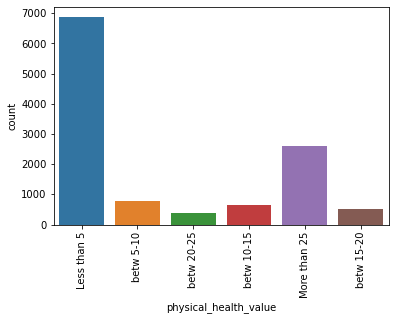

In [332]:
sns.countplot(kidney_disease.physical_health_value)
plt.xticks(rotation=90)
plt.show()

In [333]:
pd.DataFrame(kidney_disease.mental_health_value).value_counts()

mental_health_value
Less than 5            8426
More than 25           1268
betw 5-10               768
betw 10-15              524
betw 15-20              514
betw 20-25              276
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


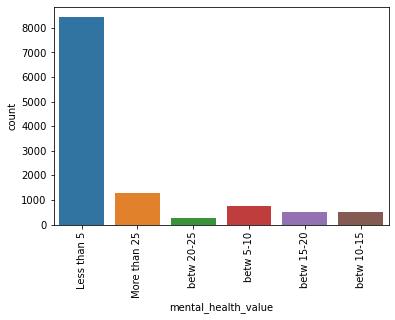

In [334]:
sns.countplot(kidney_disease.mental_health_value)
plt.xticks(rotation=90)
plt.show()

### People suffering from skin cancer

In [335]:
skin_cancer=data[data['SkinCancer']=='Yes']

In [336]:
skin_cancer

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_classifiaction,physical_health_value,mental_health_value,sleep_time_period
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,...,Yes,Very good,5.0,Yes,No,Yes,under weight,Less than 5,More than 25,less than 6 hours
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,...,No,Good,6.0,No,No,Yes,Healthy,Less than 5,Less than 5,6 hours
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,...,Yes,Fair,4.0,Yes,No,Yes,Healthy,betw 15-20,Less than 5,less than 6 hours
19,No,18.13,No,No,No,0.0,0.0,No,Male,80 or older,...,Yes,Excellent,8.0,No,No,Yes,under weight,Less than 5,Less than 5,8 hours
24,No,25.75,No,No,No,0.0,0.0,No,Female,80 or older,...,Yes,Very good,6.0,No,No,Yes,Over weight,Less than 5,Less than 5,6 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319399,No,30.91,No,No,No,0.0,0.0,Yes,Female,65-69,...,No,Fair,6.0,Yes,No,Yes,Above Obese,Less than 5,Less than 5,6 hours
319431,No,26.63,Yes,No,No,7.0,30.0,No,Female,55-59,...,Yes,Fair,6.0,No,No,Yes,Over weight,betw 5-10,More than 25,6 hours
319454,Yes,24.78,Yes,No,No,0.0,15.0,No,Male,75-79,...,No,Fair,5.0,Yes,No,Yes,Healthy,Less than 5,betw 15-20,less than 6 hours
319523,No,26.57,Yes,No,No,30.0,0.0,Yes,Female,55-59,...,Yes,Excellent,8.0,No,No,Yes,Over weight,More than 25,Less than 5,8 hours


In [337]:
pd.DataFrame(skin_cancer.AgeCategory).value_counts()

AgeCategory
80 or older    6148
70-74          5442
75-79          4736
65-69          4497
60-64          3285
55-59          2154
50-54          1277
45-49           767
40-44           414
35-39           263
30-34           159
25-29            83
18-24            67
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


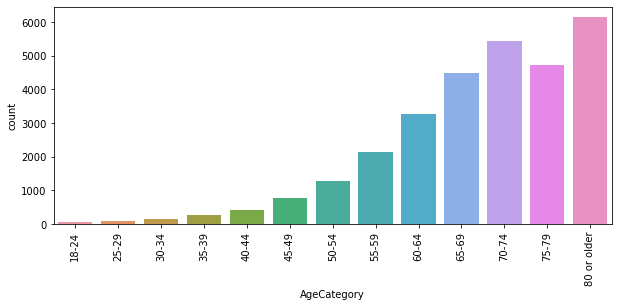

In [338]:
plt.figure(figsize=(10,4))
sns.countplot(skin_cancer.AgeCategory,order=('18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older'))
plt.xticks(rotation=90)
plt.show()

In [339]:
pd.DataFrame(skin_cancer.GenHealth).value_counts()

GenHealth
Very good    10226
Good          8964
Excellent     4566
Fair          3920
Poor          1616
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


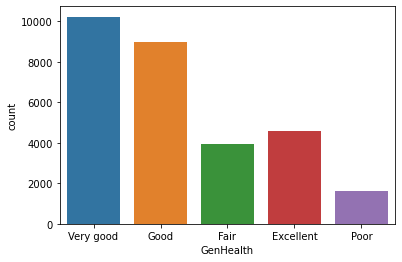

In [372]:
sns.countplot(skin_cancer.GenHealth)
plt.show()

In [341]:
pd.DataFrame(skin_cancer.BMI_classifiaction).value_counts()

BMI_classifiaction
Over weight           11393
Healthy                9040
Above Obese            8207
under weight            493
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


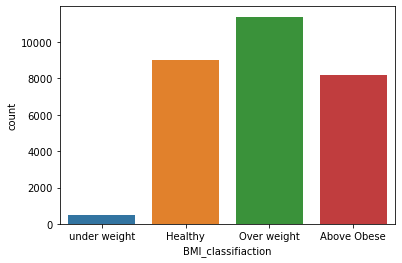

In [373]:
sns.countplot(skin_cancer.BMI_classifiaction)
plt.show()

In [343]:
pd.DataFrame(skin_cancer.physical_health_value).value_counts()

physical_health_value
Less than 5              22880
More than 25              2879
betw 5-10                 1506
betw 10-15                 944
betw 15-20                 613
betw 20-25                 470
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


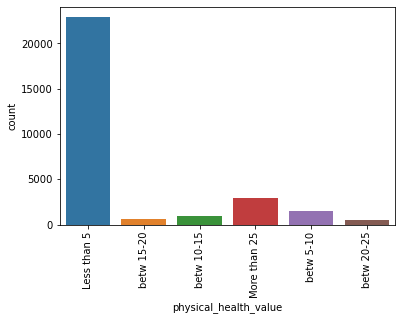

In [344]:
sns.countplot(skin_cancer.physical_health_value)
plt.xticks(rotation=90)
plt.show()

In [345]:
pd.DataFrame(skin_cancer.mental_health_value).value_counts()

mental_health_value
Less than 5            24151
More than 25            1618
betw 5-10               1541
betw 10-15               931
betw 15-20               708
betw 20-25               343
dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


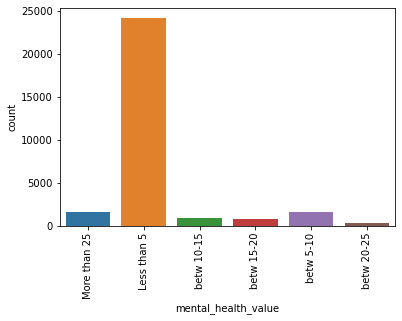

In [346]:
sns.countplot(skin_cancer.mental_health_value)
plt.xticks(rotation=90)
plt.show()

## Thank You !!